# E- Commerce - Users of C2C Fashion Store




## Context
There are a lot of unknowns when running an E-commerce store, even when you have analytics to guide your decisions.
Users are an important factor in an e-commerce business.
This is especially true in a C2C-oriented store, since they are both the suppliers (by uploading their products) AND the customers (by purchasing other user's articles).


## Introduction to the Project

This project focuses on understanding the buying behavior of users in a consumer-to-consumer (C2C) fashion e-commerce store. C2C marketplaces provide a platform where individual users can both buy and sell fashion items. The goal of this analysis is to leverage user data to predict the likelihood of a user making a purchase, which is valuable for understanding customer behavior, optimizing marketing strategies, and personalizing user experiences.

The dataset represents user activity on this C2C platform, containing features that may include user demographics, session data, browsing behavior, and possibly prior purchase history. These insights are crucial for identifying key drivers of purchase decisions in a C2C fashion context

.trvals.

## Goal of the Project
The goal of this project is to predict the probability of a user making a purchase based on various user attributes. By predicting purchase likelihood, we can gain actionable insights into the factors that drive buying behavior in a C2C fashion environment. This model will help the platform to target potential buyers more effectively and enhance user engagement..

## Main Objective

The main objective of this project is to build a predictive model that can classify users based on their likelihood to purchase items on the platform. The key steps in achieving this objective are:

Data Exploration: Analyze and understand the data's structure, relationships, and patterns.
Data Preprocessing: Clean and prepare the data for modeling, including handling missing values, encoding categorical variables, and scaling features.
Feature Engineering: Create new features or select important ones to improve model accuracy and interpretability.
Model Building: Develop and evaluate classification models to predict purchase likelihood.
Performance Evaluation: Assess model performance using key metrics to ensure reliable predictions.

## Description
Explore user behaviour of a successful website to get benchmarks. Get actionable insights about online sales and clients


## Data Story

This dataset likely includes features that capture a user’s interaction with the platform, such as the number of sessions, time spent, product views, wishlist activity, and demographic details (e.g., age, location). These attributes help paint a picture of the typical C2C fashion store user, with characteristics that may correlate with their purchasing behavior.

The target variable productsBought indicates if a user has completed a purchase, and the challenge is to identify which of the features most influence this outcome. By analyzing these variables, we aim to uncover trends and patterns that indicate high purchase likelihood, such as users who engage frequently with the platform or show high interest in specific product categories.

## Content
The data was scraped from a successful online C2C fashion store with over 9M registered users. The store was first launched in Europe around 2009 then expanded worldwide.


## Summary
##### Foreword
This users dataset is a preview of a much bigger dataset, with lots of related data (product listings of sellers, comments on listed products, etc...).


 ## Data Preprocessing

### Import necessary libraries and the dataset.
#### Importing Necessary Libraries For Data Analysis, Visualization, and Model Preparation

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split

##### Ignore Warning

In [150]:
import warnings #ignore warning
warnings.filterwarnings("ignore")

##  Importing The Data

### Loading the E-Commerce Users of a C2C Fashion Store

In [152]:
df = pd.read_csv("C:\\Users\\PRIYANKA P\\Documents\\DSML FINAL PROJECT\\E-commerce - Users of a C2C fashion store.csv")

## Describe the Dataset

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

In [145]:
df.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,1920991140,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,1920925604,user,Monaco,en,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,1920860068,user,France,fr,137,13,60,33,163,94.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,1920794532,user,Etats-Unis,en,131,10,14,122,152,92.0,...,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,1920663460,user,Etats-Unis,en,167,8,0,25,125,100.0,...,mrs,False,False,False,True,22,2854,95.13,7.93,us


In [147]:
df.describe()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,9.891300e+04,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000
mean,1.902340e+09,3.432269,8.425677,4.420743,0.093304,0.121592,0.812303,1.562595,0.171929,1.773993,581.291236,3063.771870,102.125583,8.510424
std,1.285837e+09,3.882383,52.839572,181.030569,2.050144,2.126895,8.500205,25.192793,2.332266,0.428679,208.855888,168.298621,5.609735,0.467863
min,6.544300e+04,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,8.190688e+08,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,572.000000,2857.000000,95.230000,7.940000
50%,1.638924e+09,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,694.000000,3196.000000,106.530000,8.880000
75%,2.996175e+09,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,702.000000,3201.000000,106.700000,8.890000
max,4.294967e+09,744.000000,13764.000000,51671.000000,244.000000,174.000000,100.000000,2635.000000,405.000000,3.000000,709.000000,3205.000000,106.830000,8.900000


In [13]:
df

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,1920991140,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,1920925604,user,Monaco,en,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,1920860068,user,France,fr,137,13,60,33,163,94.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,1920794532,user,Etats-Unis,en,131,10,14,122,152,92.0,...,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,1920663460,user,Etats-Unis,en,167,8,0,25,125,100.0,...,mrs,False,False,False,True,22,2854,95.13,7.93,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,3957653410,user,Etats-Unis,fr,3,8,0,0,0,0.0,...,mr,False,False,False,True,708,3204,106.80,8.90,us
98909,3957587874,user,France,fr,3,8,0,0,0,0.0,...,mr,True,False,True,True,695,3204,106.80,8.90,fr
98910,3957522338,user,Belgique,en,3,8,0,0,0,0.0,...,mr,True,True,False,True,520,3204,106.80,8.90,be
98911,3957456802,user,Italie,it,3,8,0,0,0,0.0,...,mrs,False,False,False,True,267,3204,106.80,8.90,it


In [15]:
print(df.describe())

       identifierHash  socialNbFollowers  socialNbFollows  \
count    9.891300e+04       98913.000000     98913.000000   
mean     1.902340e+09           3.432269         8.425677   
std      1.285837e+09           3.882383        52.839572   
min      6.544300e+04           3.000000         0.000000   
25%      8.190688e+08           3.000000         8.000000   
50%      1.638924e+09           3.000000         8.000000   
75%      2.996175e+09           3.000000         8.000000   
max      4.294967e+09         744.000000     13764.000000   

       socialProductsLiked  productsListed  productsSold  productsPassRate  \
count         98913.000000    98913.000000  98913.000000      98913.000000   
mean              4.420743        0.093304      0.121592          0.812303   
std             181.030569        2.050144      2.126895          8.500205   
min               0.000000        0.000000      0.000000          0.000000   
25%               0.000000        0.000000      0.000000    

In [104]:
df.shape

(98913, 24)

### Rows = 98913 and Columns = 24

In [17]:
df.isnull().sum()

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [19]:
null_counts = df.isnull().sum()
print(null_counts)

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
dtype: int64


In [23]:
df.tail()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
98908,3957653410,user,Etats-Unis,fr,3,8,0,0,0,0.0,...,mr,False,False,False,True,708,3204,106.8,8.9,us
98909,3957587874,user,France,fr,3,8,0,0,0,0.0,...,mr,True,False,True,True,695,3204,106.8,8.9,fr
98910,3957522338,user,Belgique,en,3,8,0,0,0,0.0,...,mr,True,True,False,True,520,3204,106.8,8.9,be
98911,3957456802,user,Italie,it,3,8,0,0,0,0.0,...,mrs,False,False,False,True,267,3204,106.8,8.9,it
98912,3957391266,user,Guinée,fr,3,8,0,0,0,0.0,...,mr,True,False,True,True,561,3204,106.8,8.9,gn


In [149]:
df.columns

Index(['identifierHash', 'type', 'country', 'language', 'socialNbFollowers',
       'socialNbFollows', 'socialProductsLiked', 'productsListed',
       'productsSold', 'productsPassRate', 'productsWished', 'productsBought',
       'gender', 'civilityGenderId', 'civilityTitle', 'hasAnyApp',
       'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin',
       'seniority', 'seniorityAsMonths', 'seniorityAsYears', 'countryCode'],
      dtype='object')

In [151]:
for column in df.columns:
    if df[column].dtype == "object":
        print(column)

type
country
language
gender
civilityTitle
countryCode


In [153]:
df_col = df.select_dtypes(include=["object"])
for column in df_col.columns:
    unique_count = df_col[column].nunique()
    print(f"{column} : {df[column].nunique()}")

type : 1
country : 200
language : 5
gender : 2
civilityTitle : 3
countryCode : 199


In [155]:
label_encoder = LabelEncoder()
df["type"] = label_encoder.fit_transform(df["type"])
df["country"] = label_encoder.fit_transform(df["country"])
df["language"] = label_encoder.fit_transform(df["language"])
df["gender"] = label_encoder.fit_transform(df["gender"])
df["civilityTitle"] = label_encoder.fit_transform(df["civilityTitle"])
df["countryCode"] = label_encoder.fit_transform(df["countryCode"])

df.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,1920991140,0,145,1,147,10,77,26,174,74.0,...,1,True,False,True,True,11,3196,106.53,8.88,66
1,1920925604,0,119,1,167,8,2,19,170,99.0,...,2,True,False,True,True,12,3204,106.80,8.90,119
2,1920860068,0,58,3,137,13,60,33,163,94.0,...,2,True,False,True,False,11,3203,106.77,8.90,64
3,1920794532,0,55,1,131,10,14,122,152,92.0,...,2,True,False,True,False,12,3198,106.60,8.88,185
4,1920663460,0,55,1,167,8,0,25,125,100.0,...,2,False,False,False,True,22,2854,95.13,7.93,185


In [157]:
df.describe().round(2)

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
count,9.891300e+04,98913.0,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00
mean,1.902340e+09,0.0,70.82,1.76,3.43,8.43,4.42,0.09,0.12,0.81,1.56,0.17,0.23,1.77,1.76,581.29,3063.77,102.13,8.51,93.71
std,1.285837e+09,0.0,42.52,1.15,3.88,52.84,181.03,2.05,2.13,8.50,25.19,2.33,0.42,0.43,0.44,208.86,168.30,5.61,0.47,55.17
min,6.544300e+04,0.0,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,11.00,2852.00,95.07,7.92,0.00
25%,8.190688e+08,0.0,55.00,1.00,3.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,572.00,2857.00,95.23,7.94,64.00
50%,1.638924e+09,0.0,58.00,1.00,3.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,694.00,3196.00,106.53,8.88,66.00
75%,2.996175e+09,0.0,87.00,3.00,3.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,702.00,3201.00,106.70,8.89,152.00
max,4.294967e+09,0.0,199.00,4.00,744.00,13764.00,51671.00,244.00,174.00,100.00,2635.00,405.00,1.00,3.00,2.00,709.00,3205.00,106.83,8.90,198.00


In [159]:
scaler = StandardScaler()
numeric_cols = ['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked', 'productsListed', 
                'productsSold', 'productsPassRate', 'productsWished', 'productsBought', 
                'daysSinceLastLogin', 'seniority']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [165]:
print(df.columns)
df.columns = df.columns.str.strip()
X = df.drop("productsBought", axis=1) 
y = df["productsBought"]
df = pd.get_dummies(df, drop_first=True, columns=[col for col in df.columns if col != "productsBought"])

Index(['identifierHash', 'type', 'country', 'language', 'socialNbFollowers',
       'socialNbFollows', 'socialProductsLiked', 'productsListed',
       'productsSold', 'productsPassRate', 'productsWished', 'productsBought',
       'gender', 'civilityGenderId', 'civilityTitle', 'hasAnyApp',
       'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin',
       'seniority', 'seniorityAsMonths', 'seniorityAsYears', 'countryCode'],
      dtype='object')


In [161]:
df.head()
df.dtypes
object_columns = df.select_dtypes(include="object").columns
print(object_columns)

if len(object_columns) > 0:
    df.describe(include="object")

else:
    print("No object columns found in the dataset.")

Index([], dtype='object')
No object columns found in the dataset.


## Data Vizualization¶

<Axes: xlabel='productsBought', ylabel='Density'>

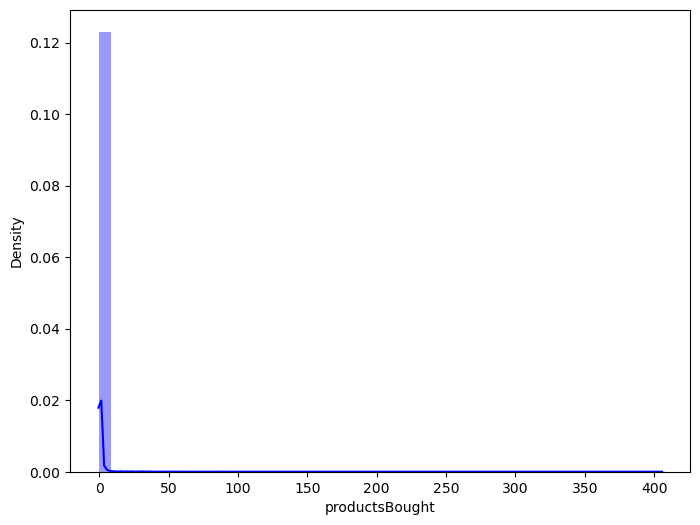

In [162]:
plt.figure(figsize=(8,6))
sns.distplot(df["productsBought"], color = 'Blue')

<Axes: xlabel='productsBought', ylabel='Density'>

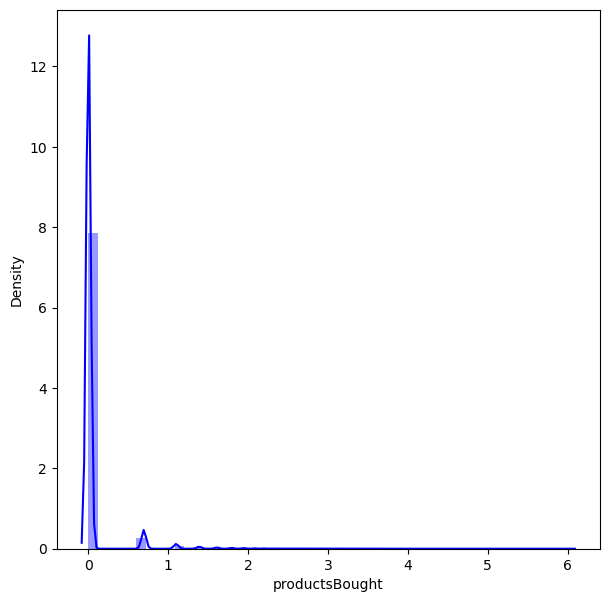

In [166]:
df["productsBought"] = np.log1p(df["productsBought"])

plt.figure(figsize=(7,7))
sns.distplot(df["productsBought"], color = "Blue")

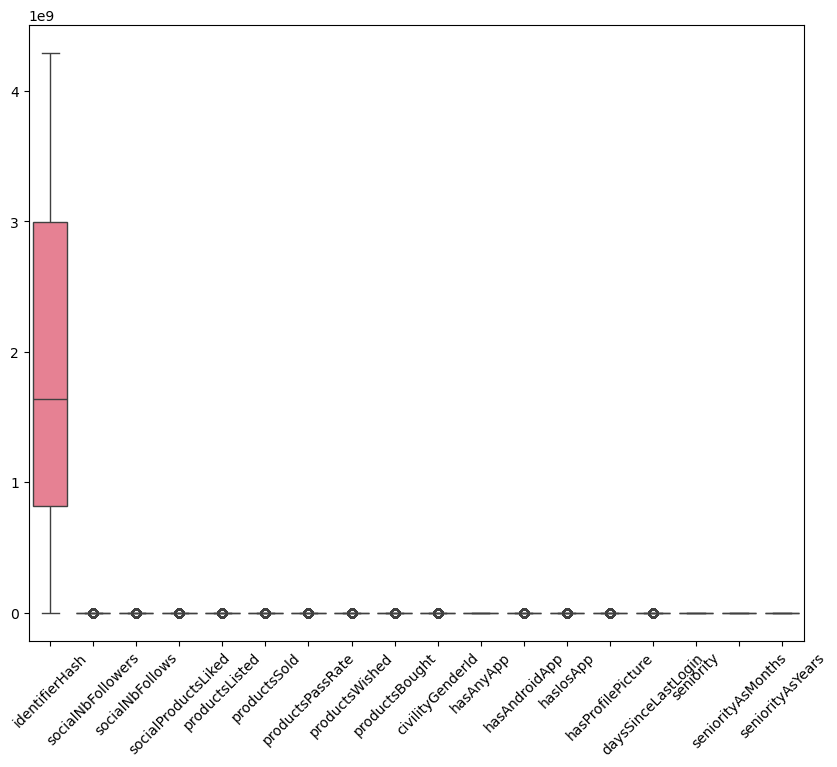

In [170]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

language
en    51564
fr    26372
it     7766
de     7178
es     6033
Name: count, dtype: int64


Text(0, 0.5, '')

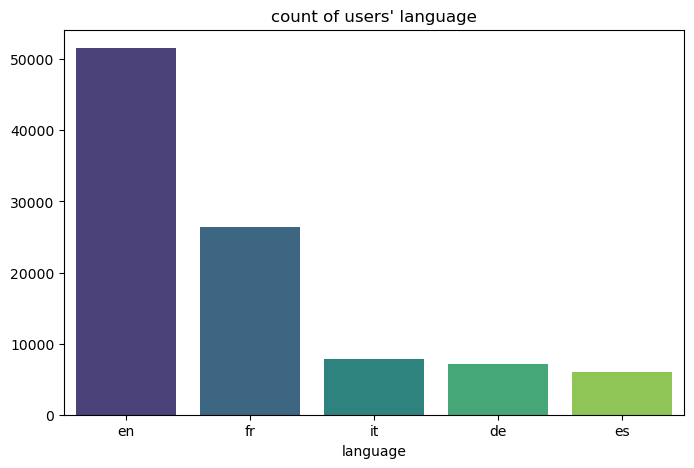

In [196]:
df_language = df["language"].value_counts()
print(df_language)

plt.figure(figsize=(8, 5) )
plt.title("count of users' language")
sns.barplot(x=df_language.index, y=df_language, palette="viridis" )
plt.ylabel("")

countryCode
fr    25135
us    20602
gb    11310
it     8015
de     6567
      ...  
td        1
lc        1
bl        1
um        1
im        1
Name: count, Length: 199, dtype: int64


Text(0, 0.5, '')

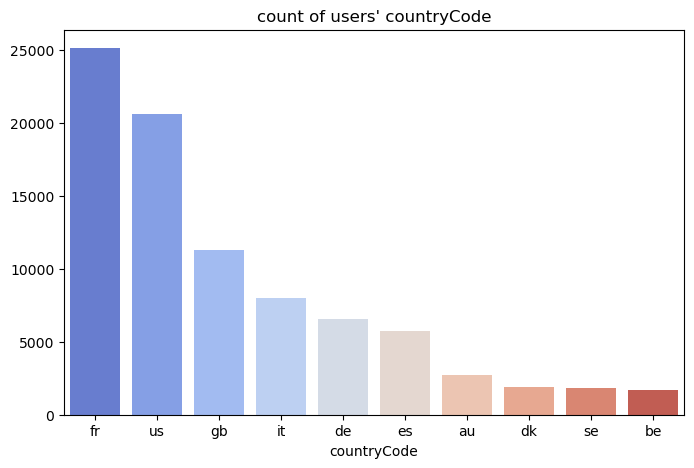

In [200]:
df_countryCode = df"countryCode"].value_counts()
print(df_countryCode )

plt.figure(figsize=(8, 5) )
plt.title("count of users' countryCode")
sns.barplot(x=df_countryCode[:10].index, y=df_countryCode[:10], palette="coolwarm" ) 
plt.ylabel("")

count    98913.000000
mean         0.058182
std          0.282989
min          0.000000
0%           0.000000
20%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
80%          0.000000
max          6.006353
Name: productsBought, dtype: float64
0 productsBought     93494
1 productsBought         0
>1 productsBought     2122
dtype: int64


Text(0, 0.5, '')

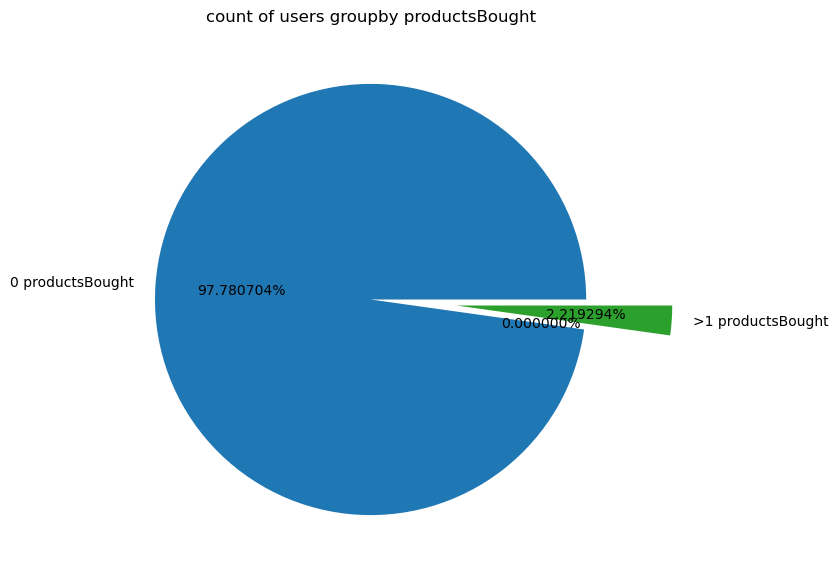

In [172]:
print(df['productsBought'].describe(percentiles= [x/100 for x in range(0, 100, 20) ] ) )
df_productsBought = pd.Series({
    '0 productsBought': df['productsBought'][df['productsBought'] == 0].count(),
    '1 productsBought': df['productsBought'][df['productsBought'] == 1].count(),
    '>1 productsBought': df['productsBought'][df['productsBought'] > 1].count()
    })
print(df_productsBought)
plt.figure(figsize=(7,7) )
plt.title("count of users groupby productsBought")
df_productsBought.plot.pie(labels= df_productsBought.index, autopct='%0f%%', explode=(0, 0.2, 0.4) )
plt.ylabel("")

count    98913.000000
mean         0.121592
std          2.126895
min          0.000000
0%           0.000000
20%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
80%          0.000000
max        174.000000
Name: productsSold, dtype: float64
0 productsSold     96877
1 productsSold       917
>1 productsSold     1119
dtype: int64


Text(0, 0.5, '')

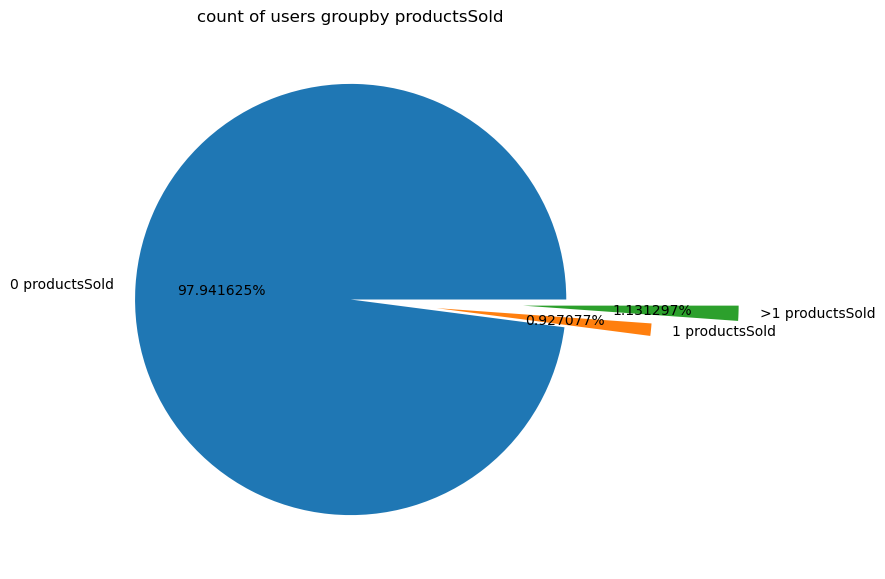

In [174]:
print(df['productsSold'].describe(percentiles= [x/100 for x in range(0, 100, 20) ] ) )
df_productsSold = pd.Series({
    '0 productsSold': df['productsSold'][df['productsSold'] == 0].count(),
    '1 productsSold': df['productsSold'][df['productsSold'] == 1].count(),
    '>1 productsSold': df['productsSold'][df['productsSold'] > 1].count()
    })
print(df_productsSold)
plt.figure(figsize=(7,7) )
plt.title("count of users groupby productsSold")
df_productsSold.plot.pie(labels= df_productsSold.index, autopct='%0f%%', explode=(0, 0.4, 0.8) )
plt.ylabel("")

non-active user            92020
active buyer                   0
highly active buyer         1751
active seller                683
highly active seller         791
multiple identity users      562
dtype: int64

sum of count: 95807


Text(0, 0.5, '')

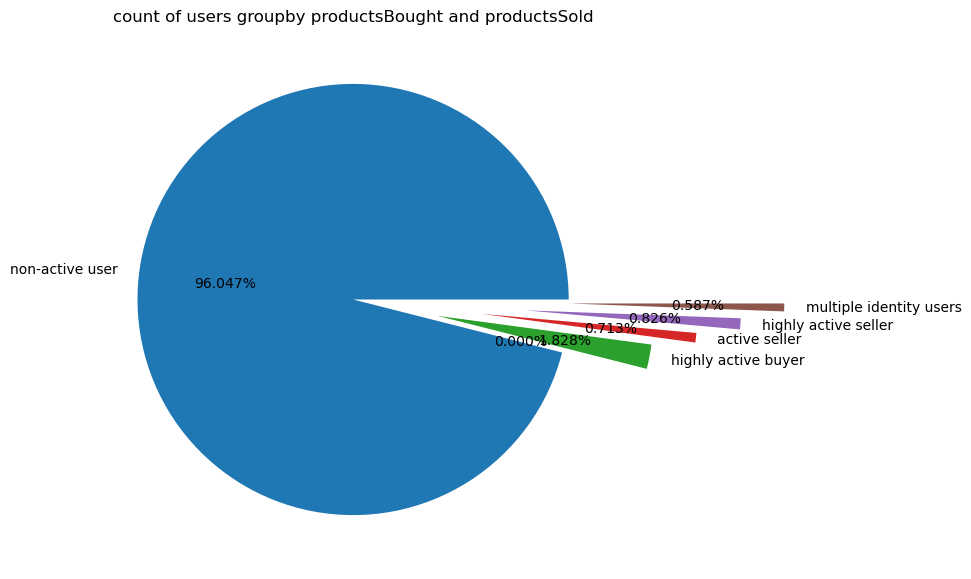

In [184]:
df_productsBoughtAndSold = pd.Series({
    'non-active user': df['productsWished'][(df['productsBought'] == 0) & (df['productsSold'] == 0) ].count(),
    'active buyer': df['productsWished'][(df['productsBought'] == 1) & (df['productsSold'] == 0) ].count(),
    'highly active buyer': df['productsWished'][(df['productsBought'] > 1) & (df['productsSold'] == 0)].count(),
    'active seller': df['productsWished'][(df['productsBought'] == 0) & (df['productsSold'] == 1)].count(),
    'highly active seller': df['productsWished'][(df['productsBought'] == 0) & (df['productsSold'] > 1)].count(),
    'multiple identity users': df['productsWished'][(df['productsBought'] > 0) & (df['productsSold'] > 0)].count()
    })
print(df_productsBoughtAndSold )
print(f'\nsum of count: {df_productsBoughtAndSold.sum()}' )
plt.figure(figsize=(7,7) )
plt.title("count of users groupby productsBought and productsSold")
df_productsBoughtAndSold.plot.pie(autopct='%0.3f%%', explode=[x/5 for x in range(0, len(df_productsBoughtAndSold), 1) ] )
plt.ylabel("")

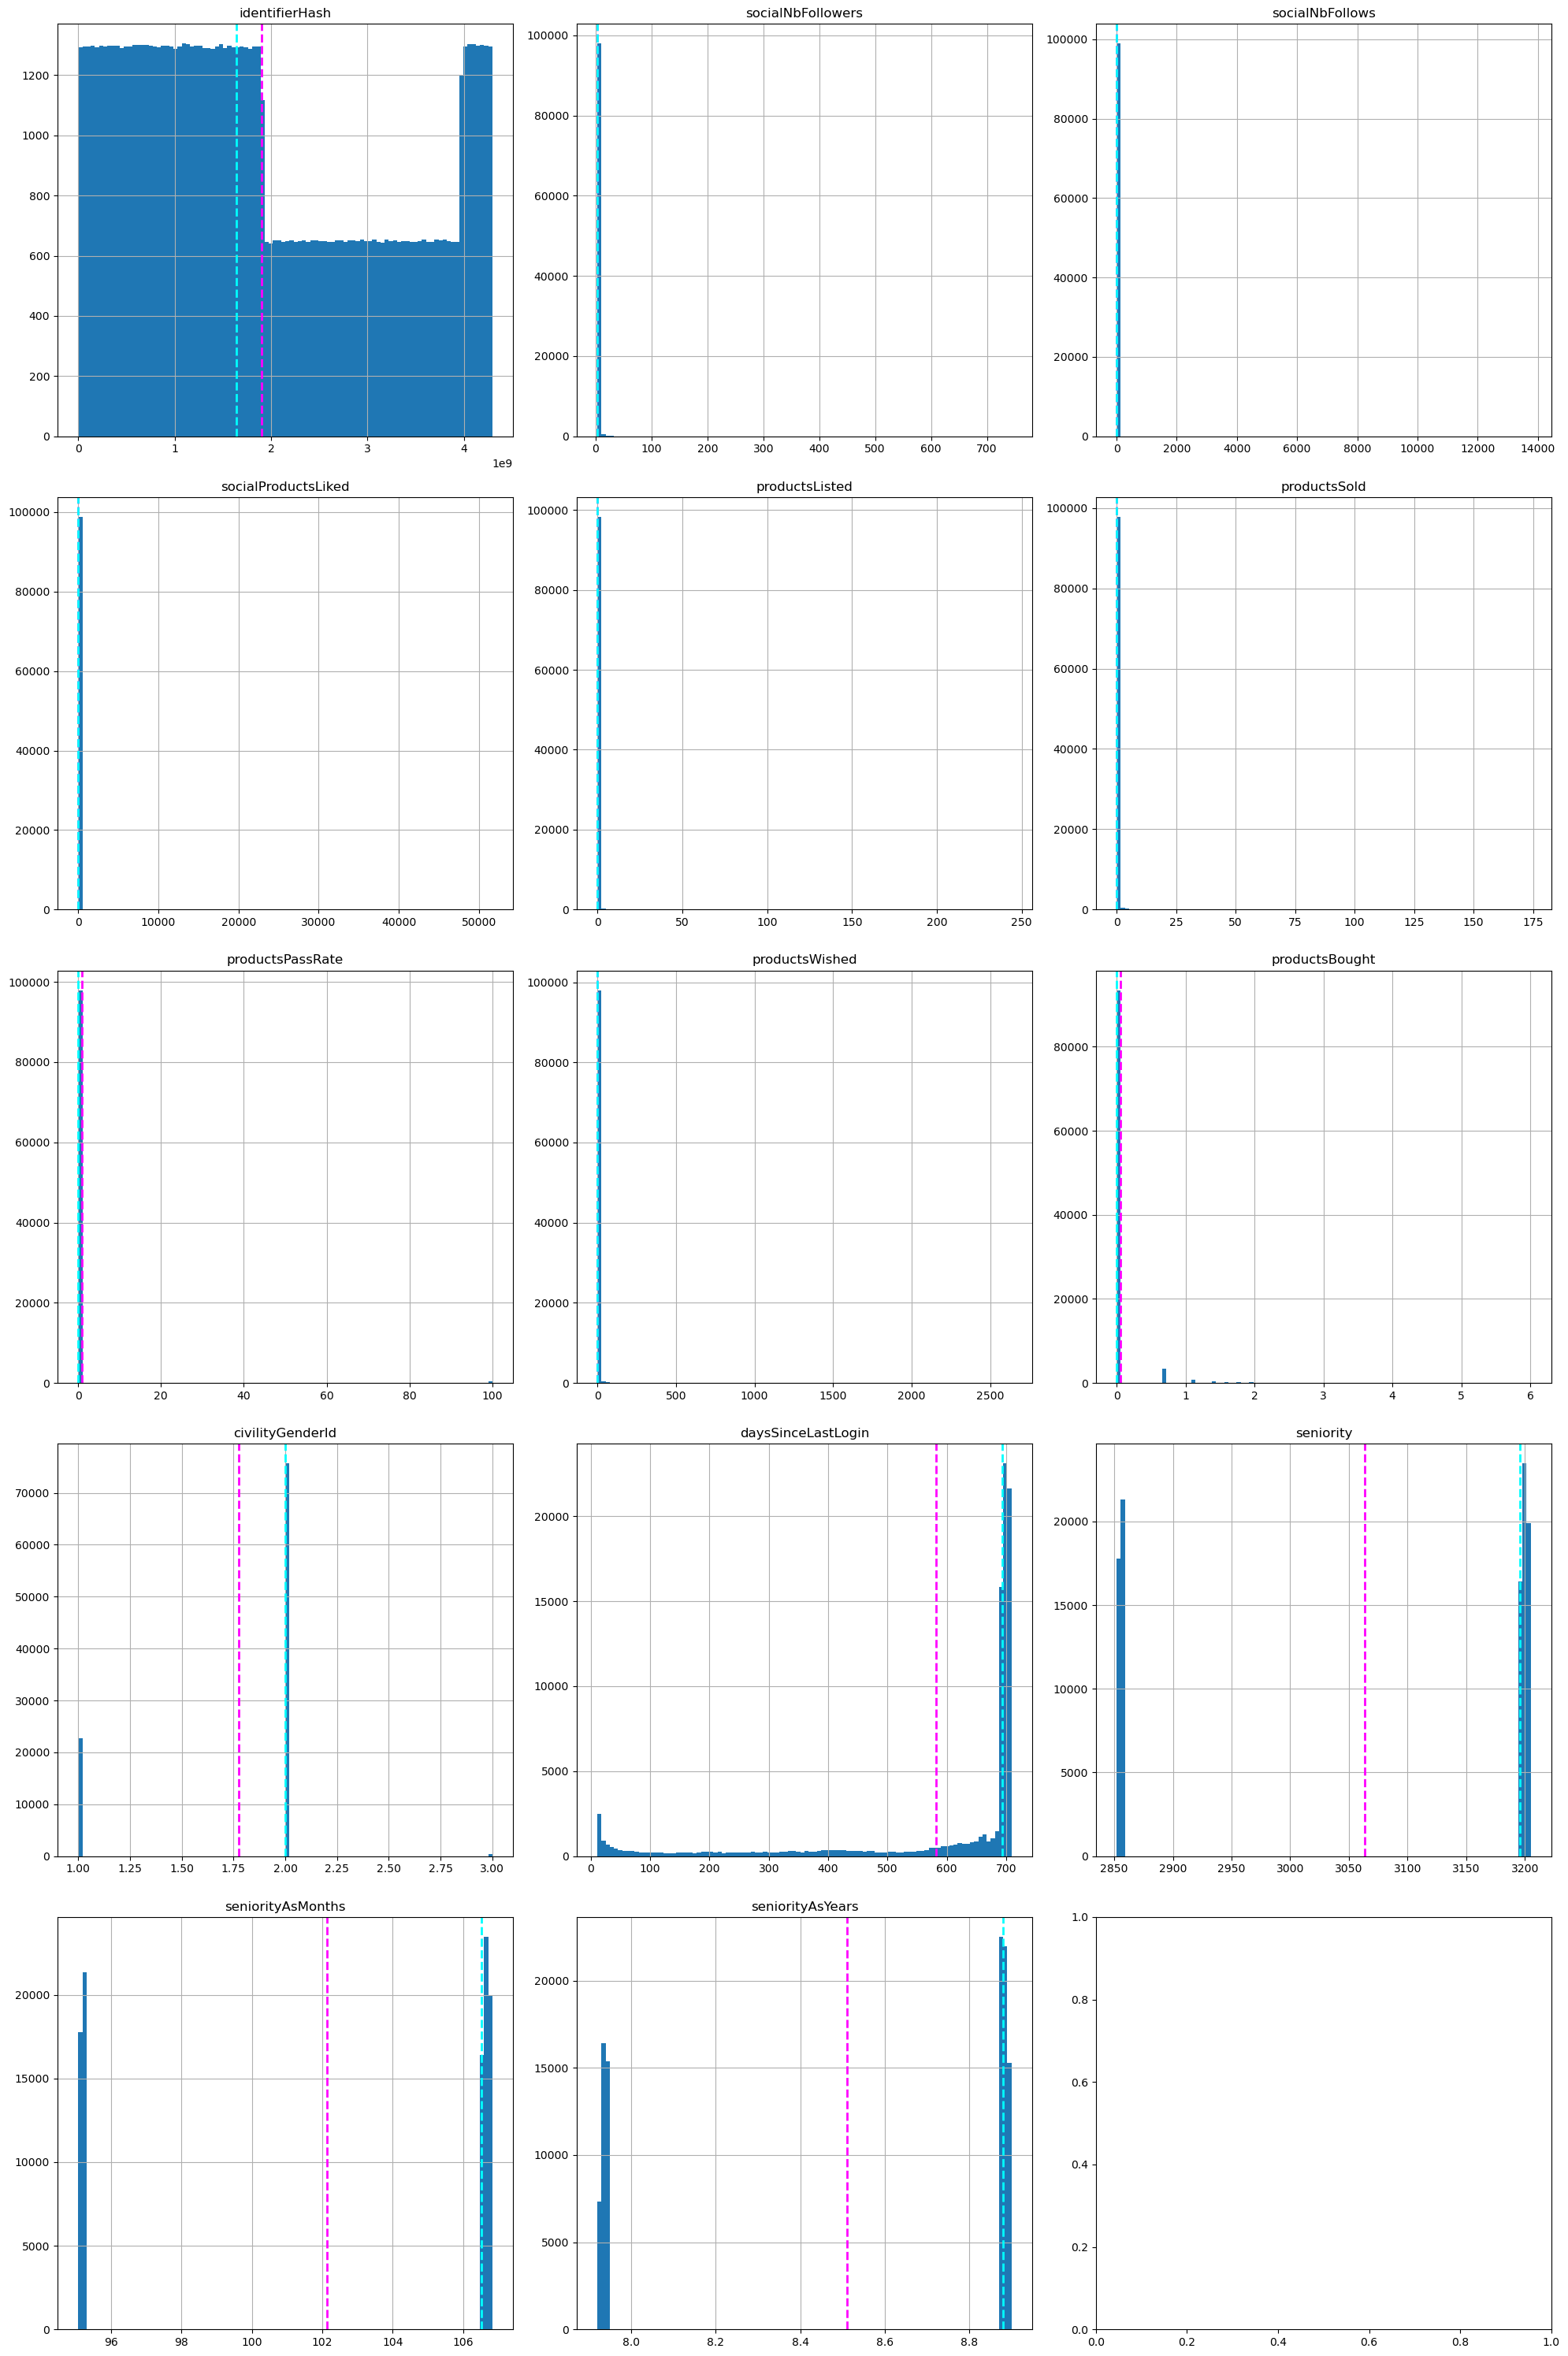

In [204]:
# Determine the number of rows and columns needed for the subplots
n_cols = 3  # Number of columns (you can adjust this based on your preference)
n_rows = (len(df.select_dtypes(include="number").columns) + n_cols - 1) // n_cols  # Calculate number of rows

# Create subplots with a grid layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 30))  # Adjust the figsize as needed

# Flatten the axes to make it easy to iterate over
axes = axes.flatten()

# Loop through numeric columns in the DataFrame
for i, col in enumerate(df.select_dtypes(include="number").columns):
    if col == "MeasureDesc":
        continue
    
    # Select the axis for the current plot
    ax = axes[i]
    
    # Plot the histogram for the column
    feature = df[col]
    feature.hist(bins=100, ax=ax)
    
    # Add vertical lines for mean and median
    ax.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    
    # Set the title for the subplot
    ax.set_title(col)

# Adjust layout to make sure plots don't overlap
plt.tight_layout()

# Show all the plots at once
plt.show()

In [210]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation
correlation = numeric_df.corr()
print(correlation)

                     identifierHash  socialNbFollowers  socialNbFollows  \
identifierHash             1.000000          -0.018000        -0.000166   
socialNbFollowers         -0.018000           1.000000         0.702766   
socialNbFollows           -0.000166           0.702766         1.000000   
socialProductsLiked       -0.001882           0.653540         0.809462   
productsListed            -0.000756           0.343603         0.091306   
productsSold              -0.000138           0.627167         0.175296   
productsPassRate          -0.001088           0.351293         0.055519   
productsWished            -0.006236           0.334733         0.266589   
productsBought            -0.027841           0.183469         0.007676   
civilityGenderId          -0.002666           0.013622         0.001672   
daysSinceLastLogin         0.028541          -0.159292        -0.019811   
seniority                  0.485992           0.006034         0.004150   
seniorityAsMonths        

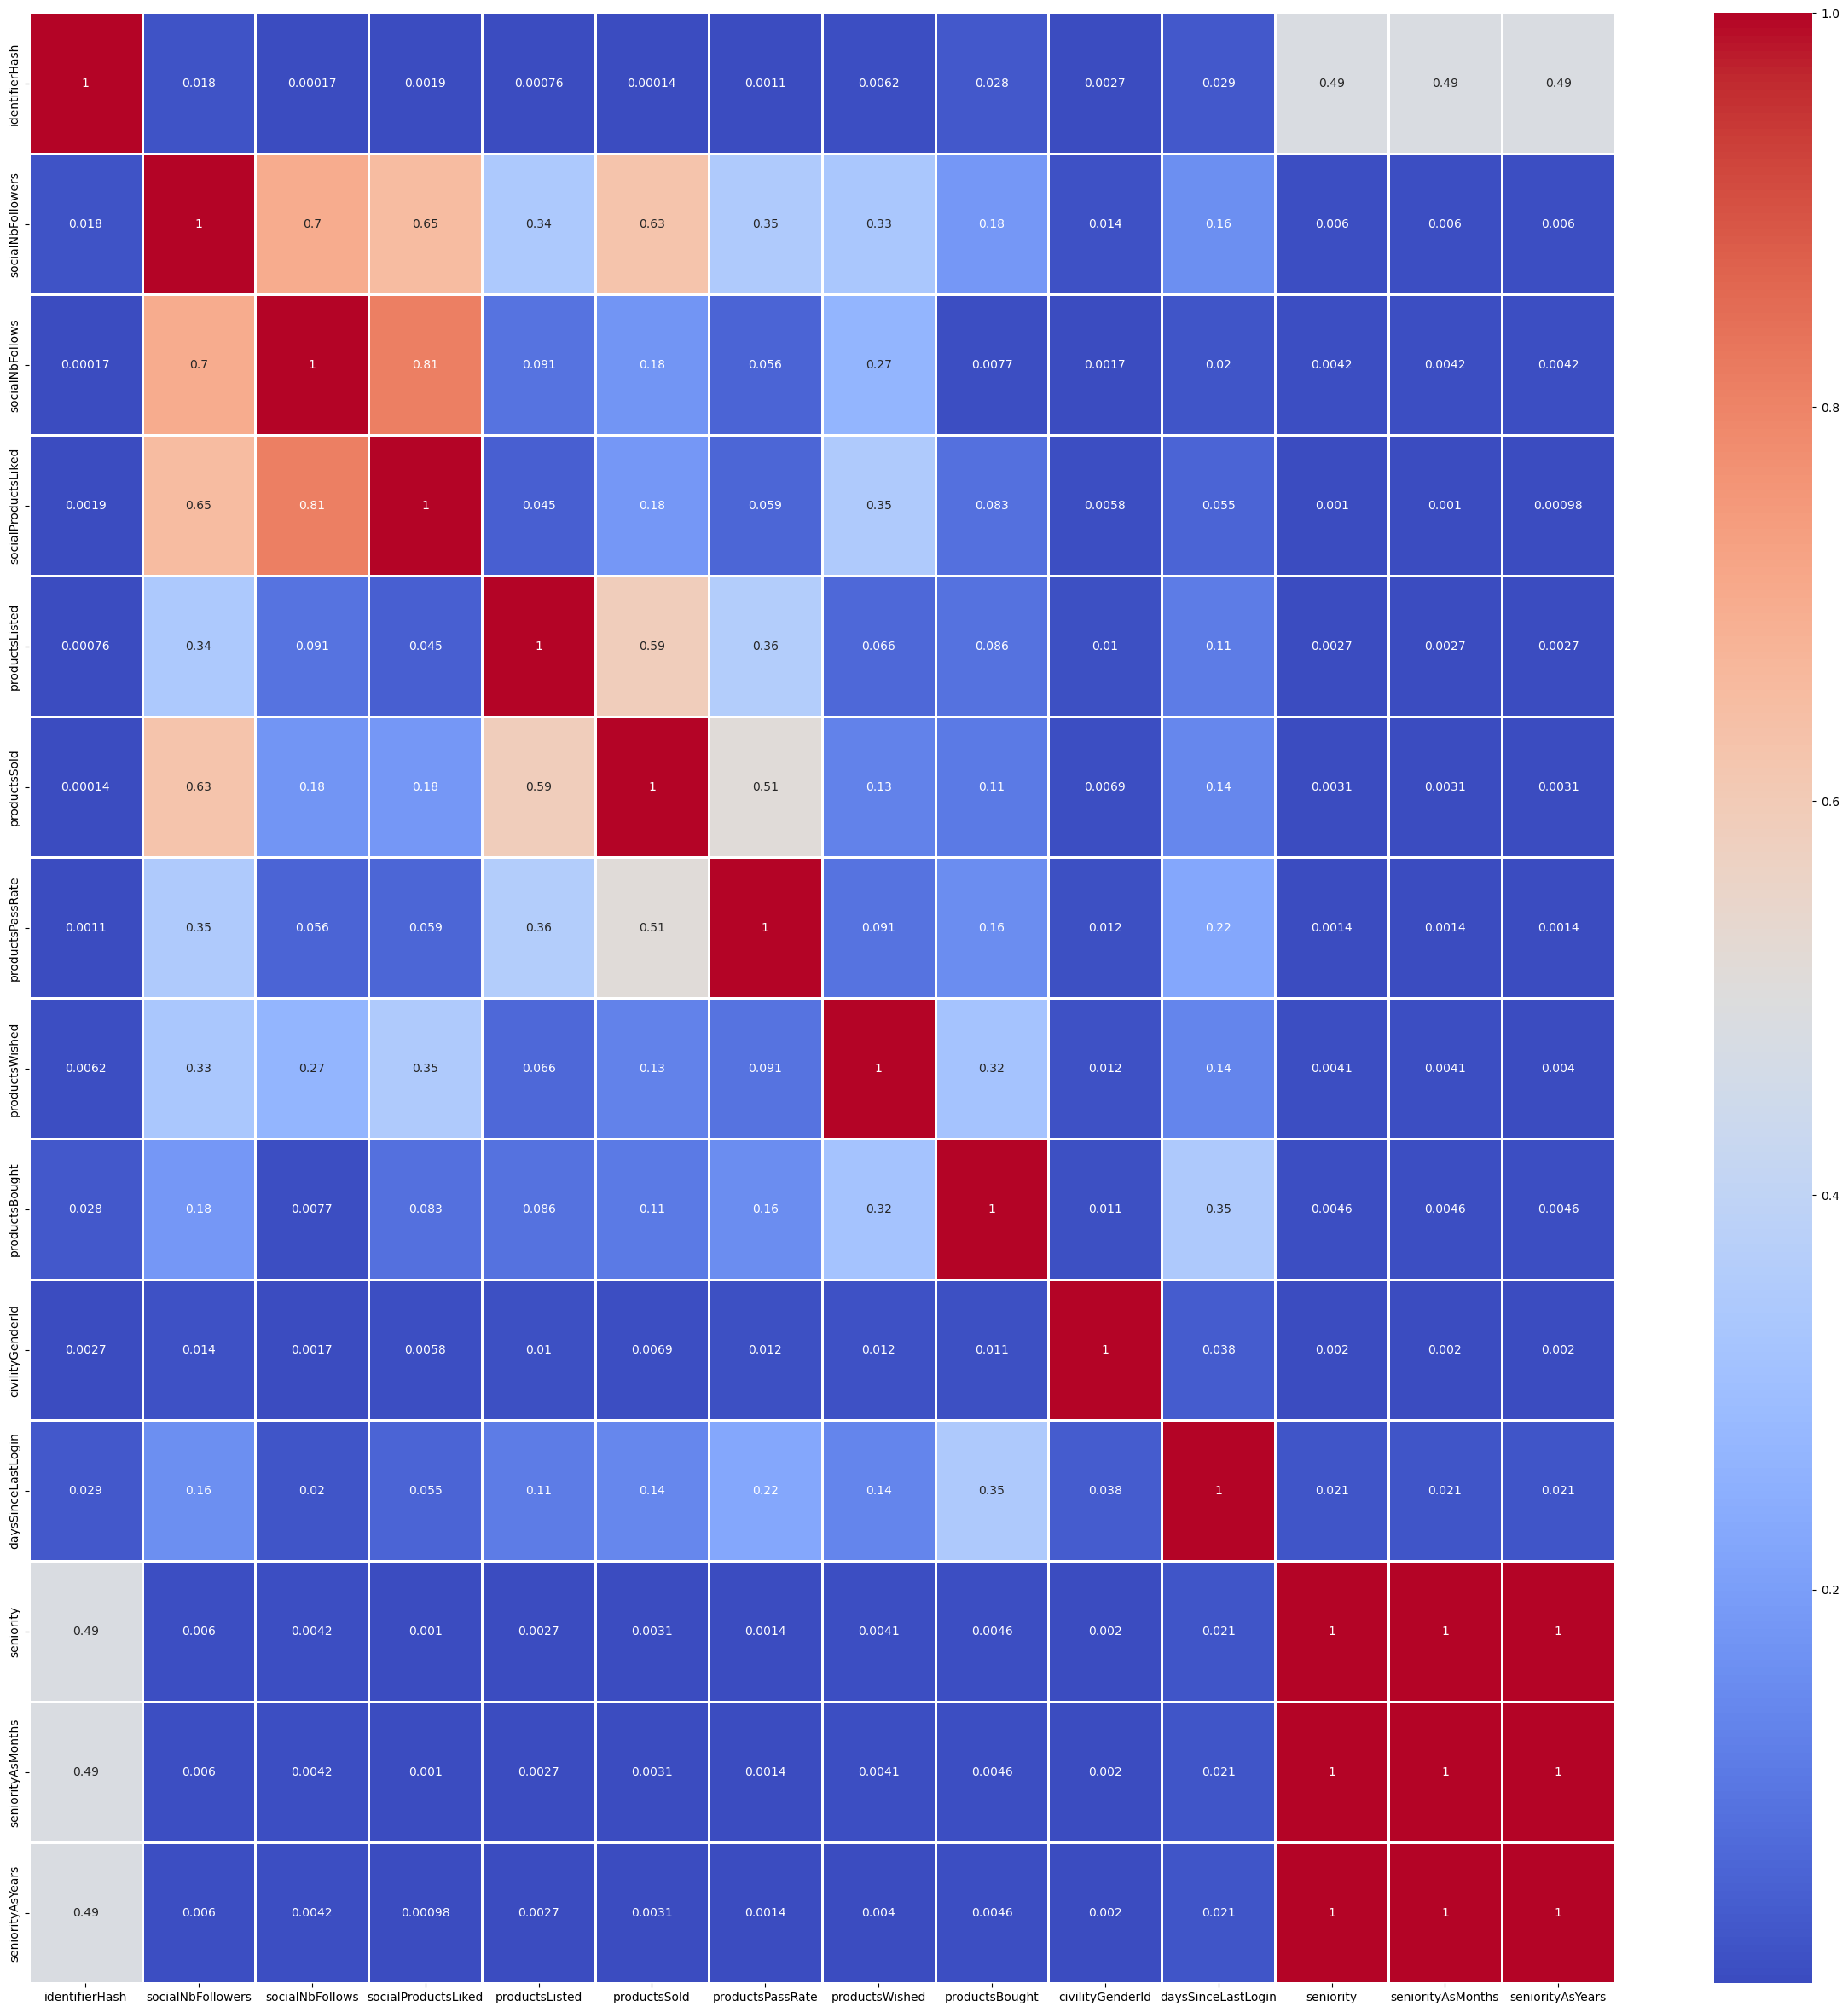

In [212]:
plt.figure(figsize=(30,30))
sns.heatmap(abs(correlation) ,annot =True , cmap = 'coolwarm', linewidth = 1)
plt.show()

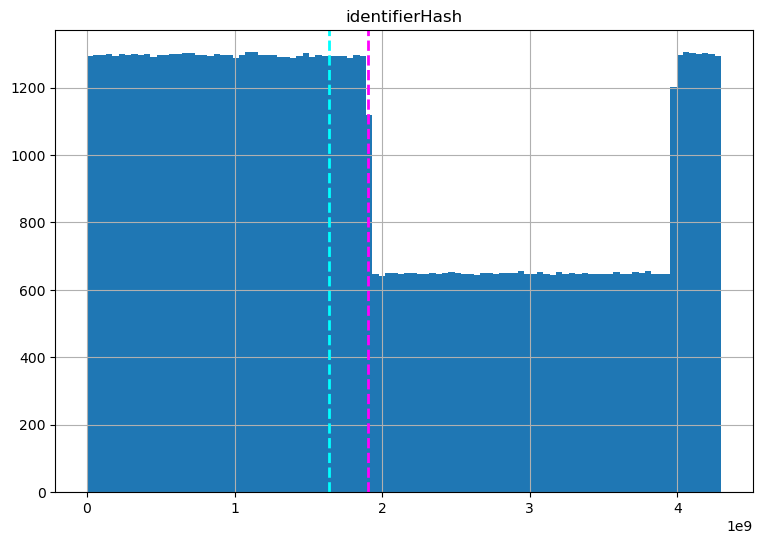

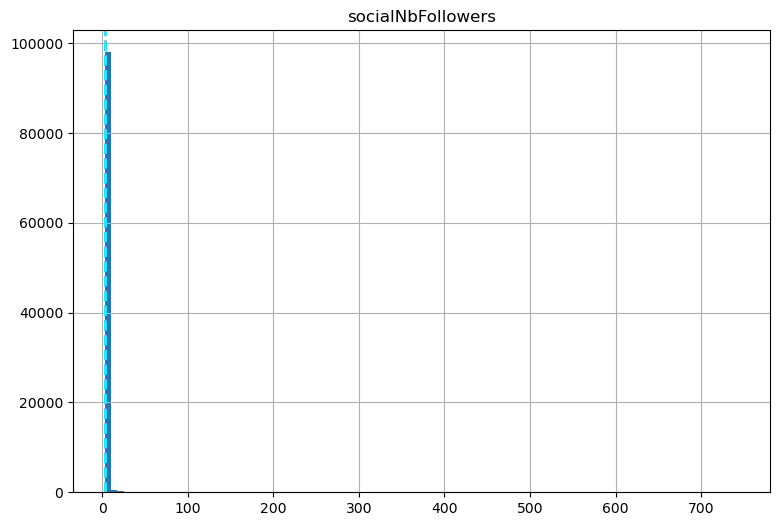

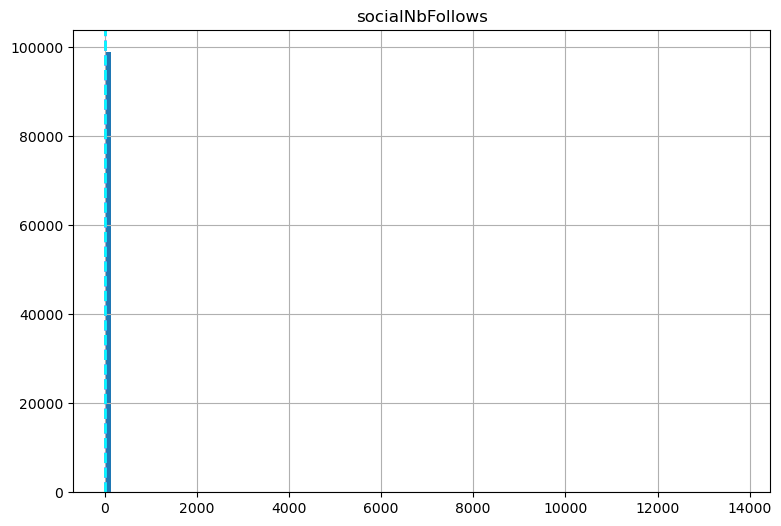

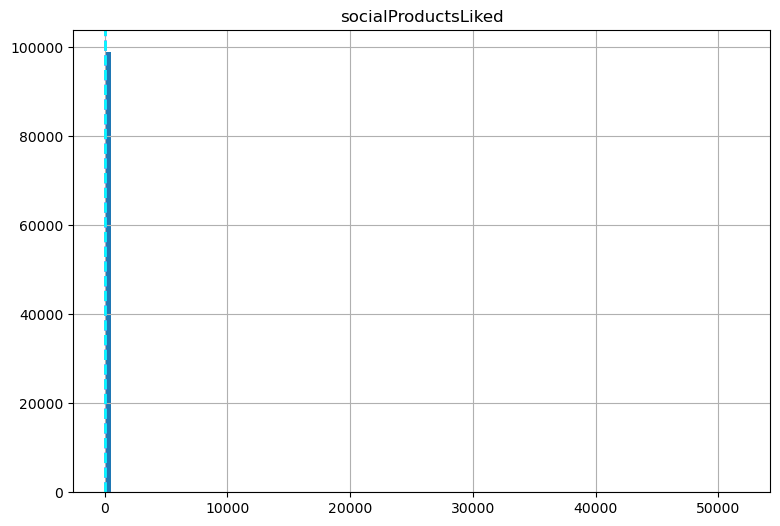

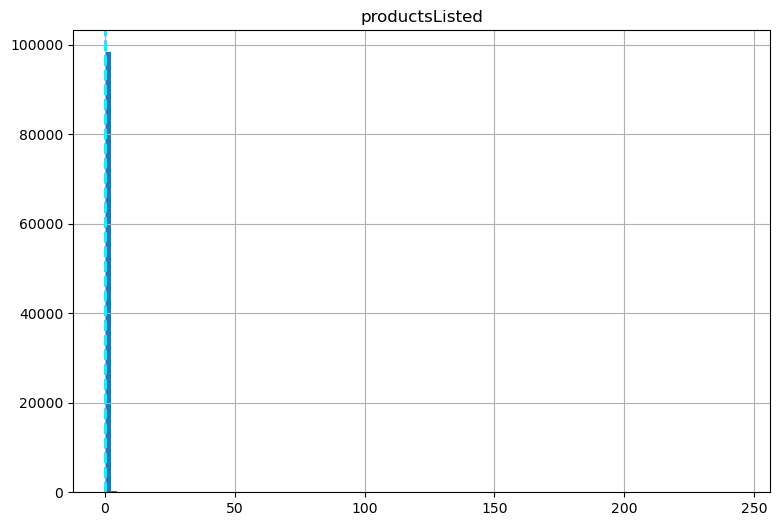

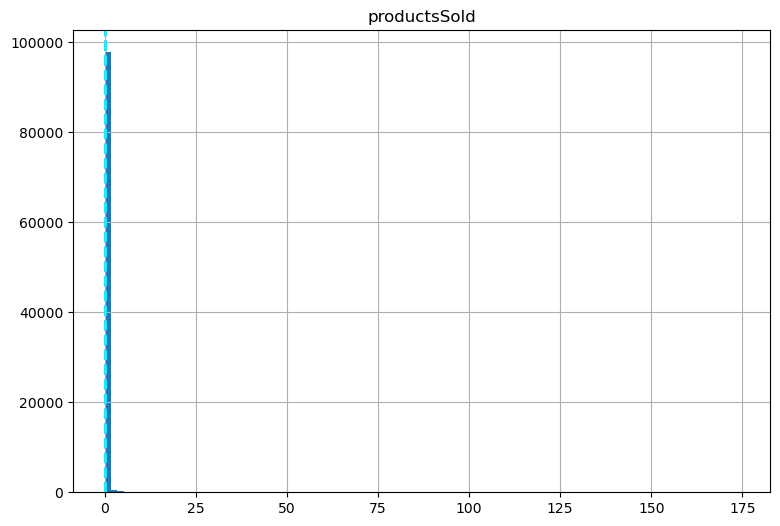

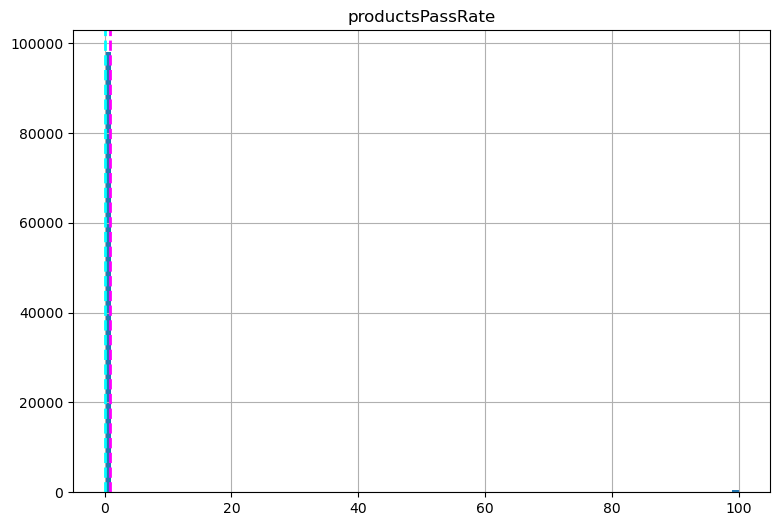

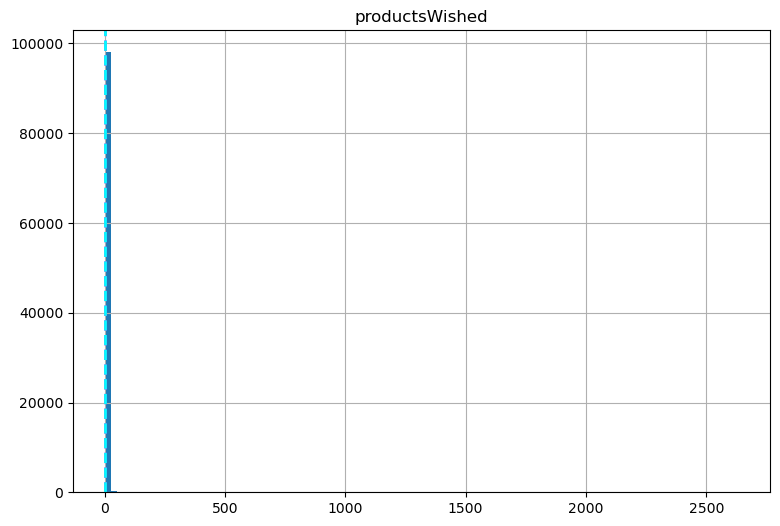

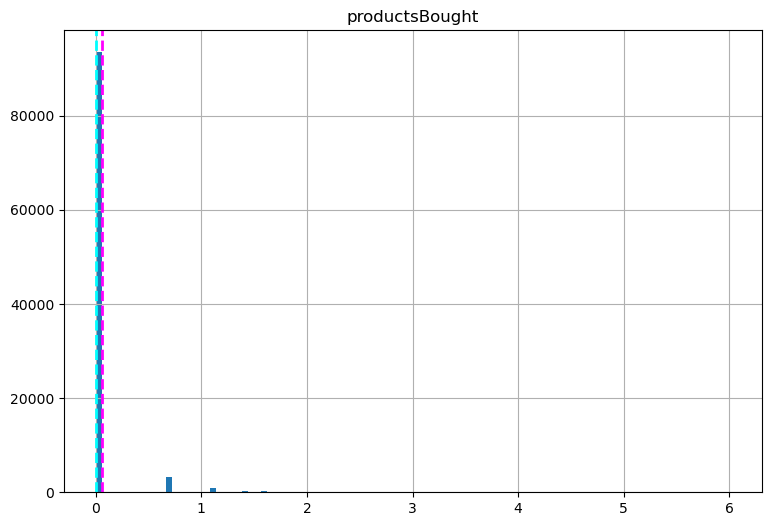

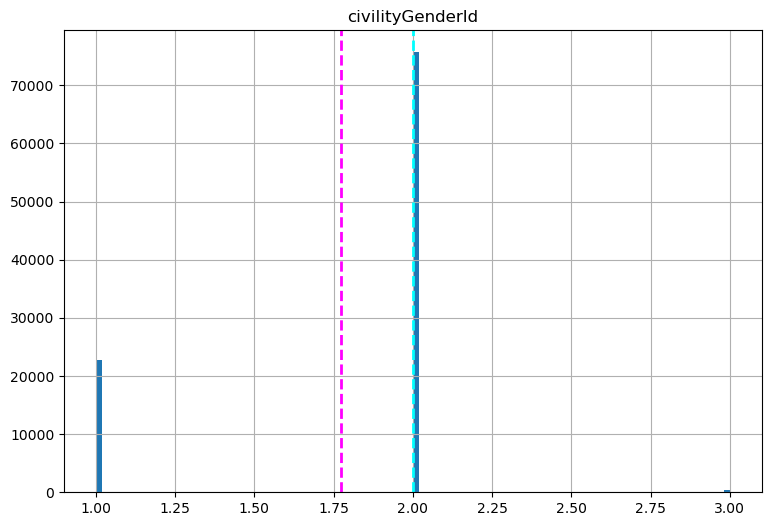

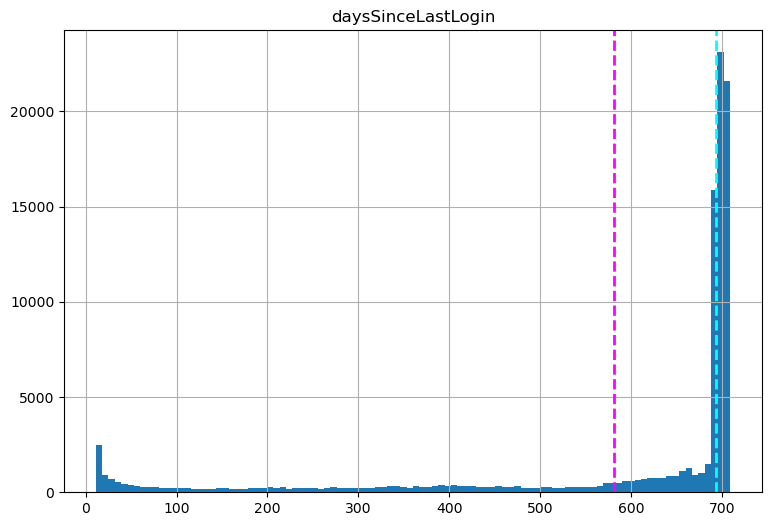

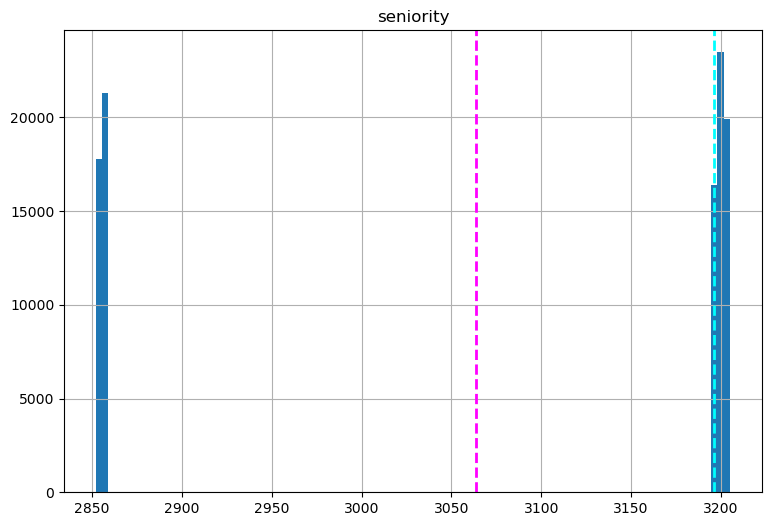

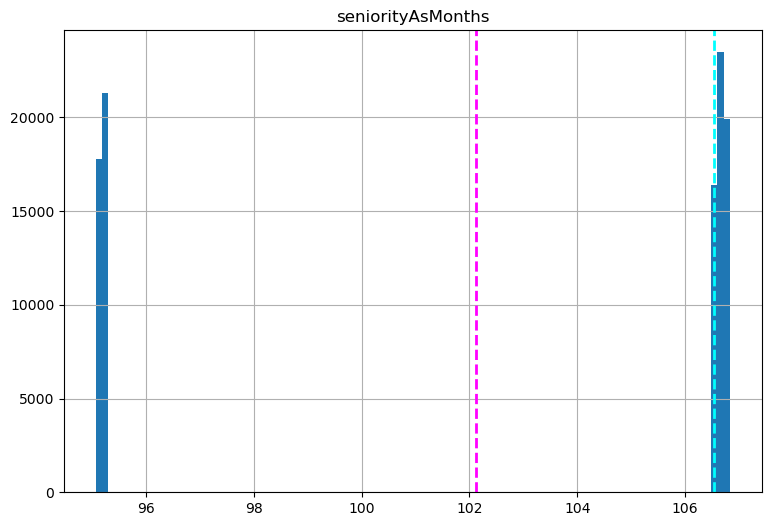

In [216]:
for col in numeric_cols[:-1]:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = (df[col])
    feature.hist(bins=100, ax = ax)
    ax.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()
     

### Handling Outliers & Outlier treatments

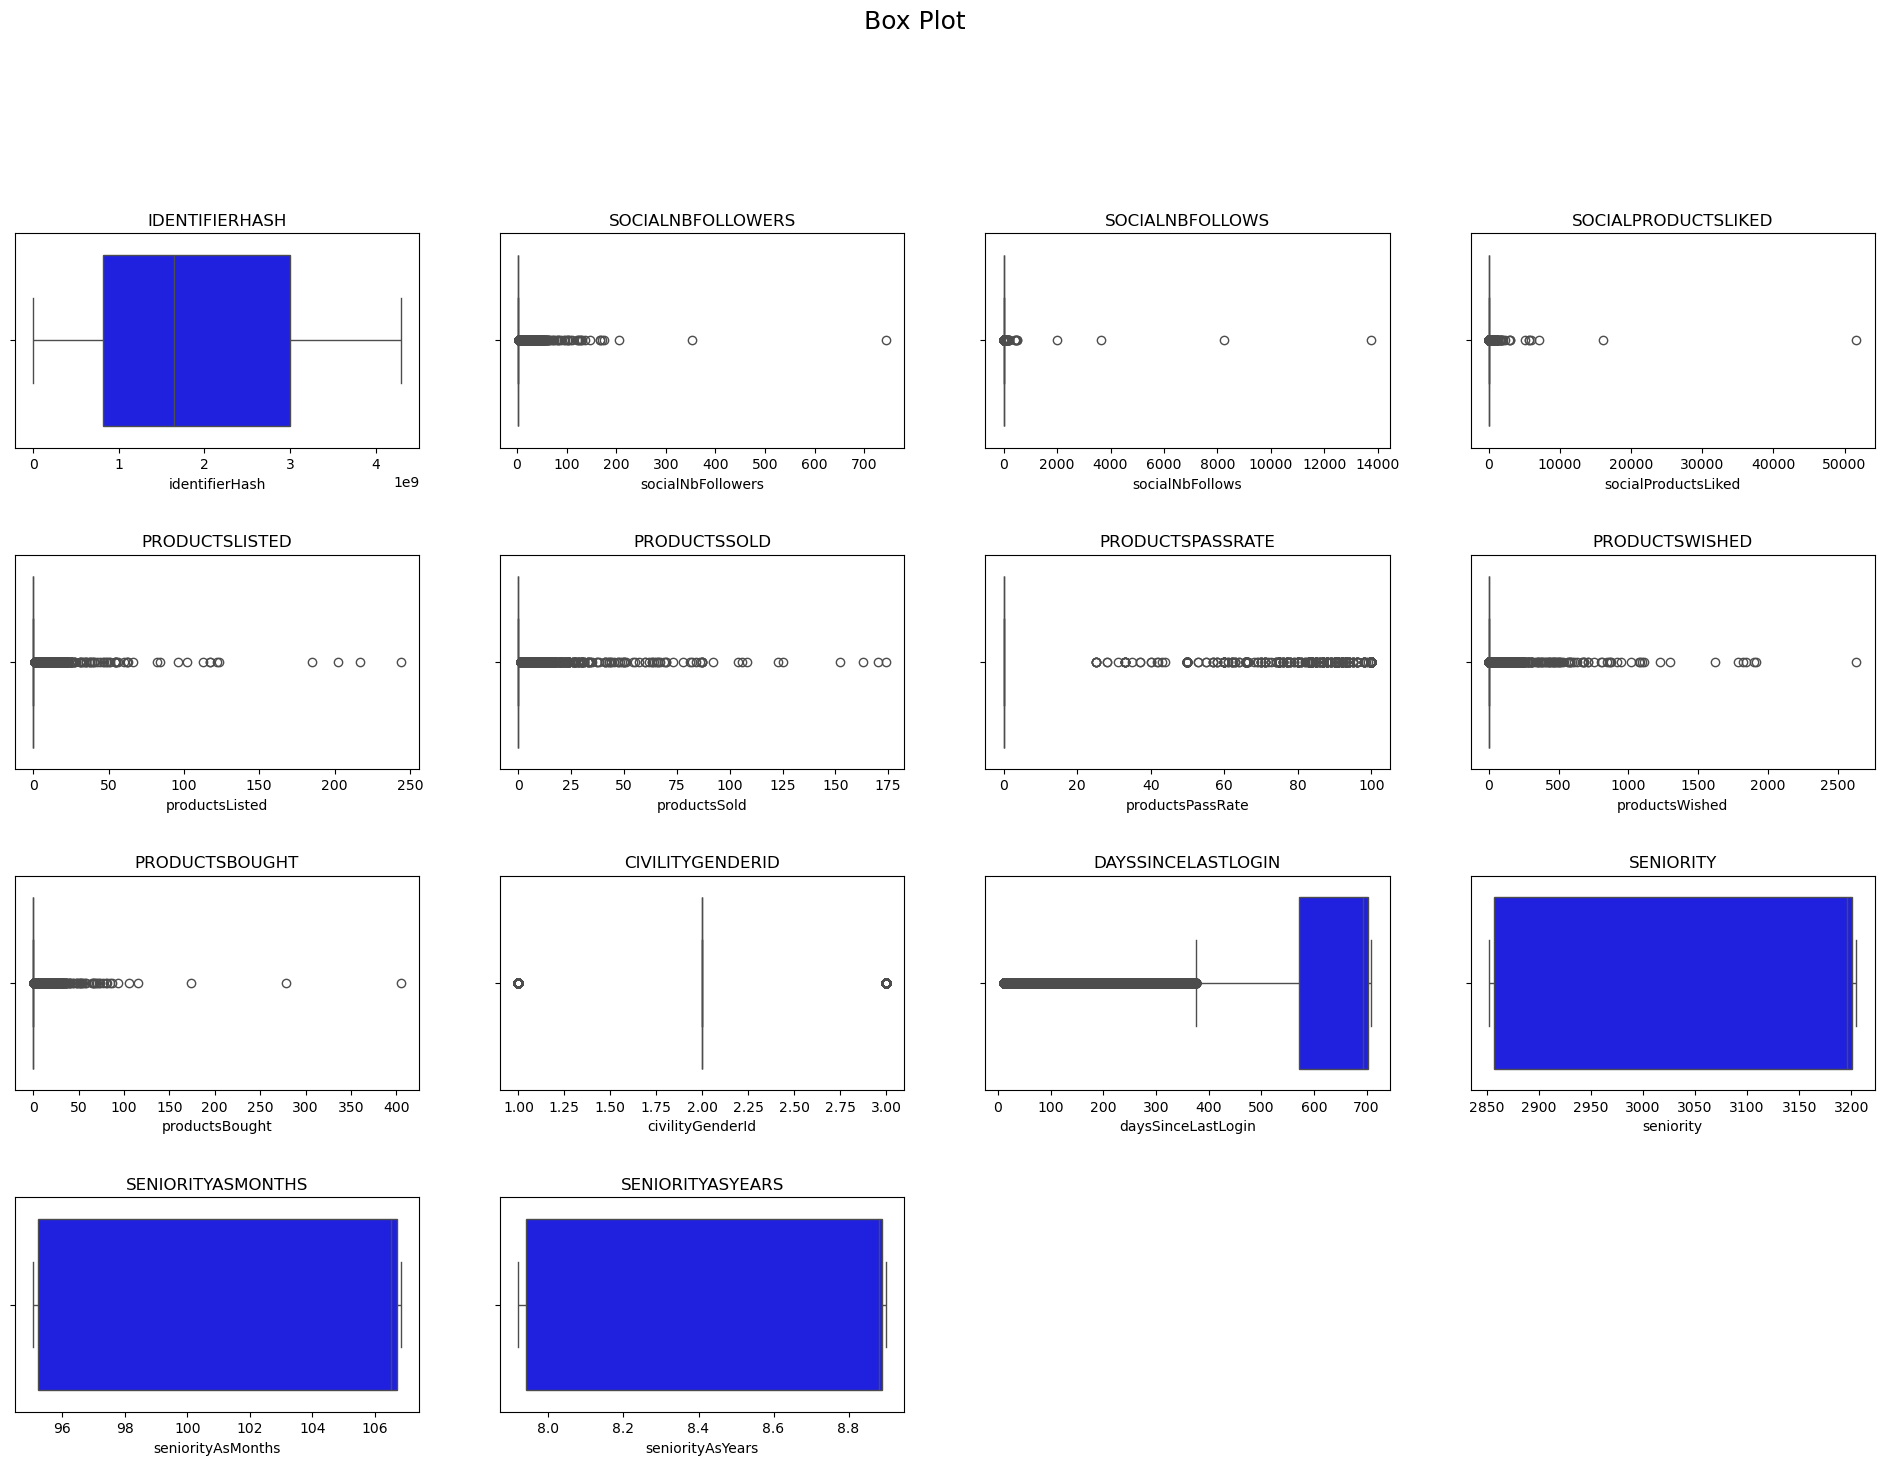

In [60]:
df= df.copy()
col_list = list(df.describe().columns)

#find the outliers using boxplot
plt.figure(figsize=(24, 32))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='blue', ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [188]:
print("Outliers :")
print(df)

Outliers :
       productsBought  identifierHash_130979  identifierHash_262052  \
14254       -0.073718                  False                  False   
14261       -0.073718                  False                  False   
14262       -0.073718                  False                  False   
14264       -0.073718                  False                  False   
14265       -0.073718                  False                  False   
...               ...                    ...                    ...   
98899       -0.073718                  False                  False   
98900       -0.073718                  False                  False   
98902       -0.073718                  False                  False   
98906       -0.073718                  False                  False   
98907       -0.073718                  False                  False   

       identifierHash_589731  identifierHash_720804  identifierHash_851875  \
14254                  False                  False       

In [109]:
def Find_Outliers_IQR(df_no):
     # Select only numeric columns
    numeric_df = df_no.select_dtypes(include=['number'])

    # Calculate the first quartile (Q1) and third quartile (Q3) for each column
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)

    # Calculate the interquartile range (IQR) for each column
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers for each column
    lower_bound = Q1 - 1.5 *IQR
    upper_bound = Q3 + 1.5 * IQR

    # Check for outliers in each column and count the number of outliers
    outliers_count = (numeric_df < lower_bound) | (numeric_df> upper_bound)
    num_outliers = outliers_count.sum()

    return num_outliers


outliers_per_column = Find_Outliers_IQR(df)
print("Number of outliers per column:")
print(outliers_per_column.sort_values(ascending = False))


Number of outliers per column:
civilityGenderId       23229
daysSinceLastLogin     16584
socialProductsLiked    15926
socialNbFollowers      13974
productsWished          9301
productsBought          5419
socialNbFollows         4020
productsSold            2036
productsListed          1724
productsPassRate         934
identifierHash             0
seniority                  0
seniorityAsMonths          0
seniorityAsYears           0
dtype: int64


In [80]:
# Handling Outliers & Outlier treatments
print(col_list)
for ftr in col_list:
  print(ftr,'\n')
  q_25= np.percentile(df[ftr], 25)
  q_75 = np.percentile(df[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")
  # identify outliers
  outliers = [x for x in df[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  
  #removing outliers
  
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]



    df[ftr] =  df.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")
     

['identifierHash', 'socialNbFollowers', 'socialNbFollows', 'socialProductsLiked', 'productsListed', 'productsSold', 'productsPassRate', 'productsWished', 'productsBought', 'civilityGenderId', 'daysSinceLastLogin', 'seniority', 'seniorityAsMonths', 'seniorityAsYears']
identifierHash 

Percentiles: 25th=697171875.000, 75th=3245670307.000, IQR=2548498432.000

lower = -3125575773.0 and upper = 7068417955.0 
 
Identified outliers: 0

-------

socialNbFollowers 

Percentiles: 25th=3.000, 75th=3.000, IQR=0.000

lower = 3.0 and upper = 3.0 
 
Identified outliers: 0

-------

socialNbFollows 

Percentiles: 25th=8.000, 75th=8.000, IQR=0.000

lower = 8.0 and upper = 8.0 
 
Identified outliers: 0

-------

socialProductsLiked 

Percentiles: 25th=0.000, 75th=0.000, IQR=0.000

lower = 0.0 and upper = 0.0 
 
Identified outliers: 0

-------

productsListed 

Percentiles: 25th=0.000, 75th=0.000, IQR=0.000

lower = 0.0 and upper = 0.0 
 
Identified outliers: 0

-------

productsSold 

Percentiles: 25th=

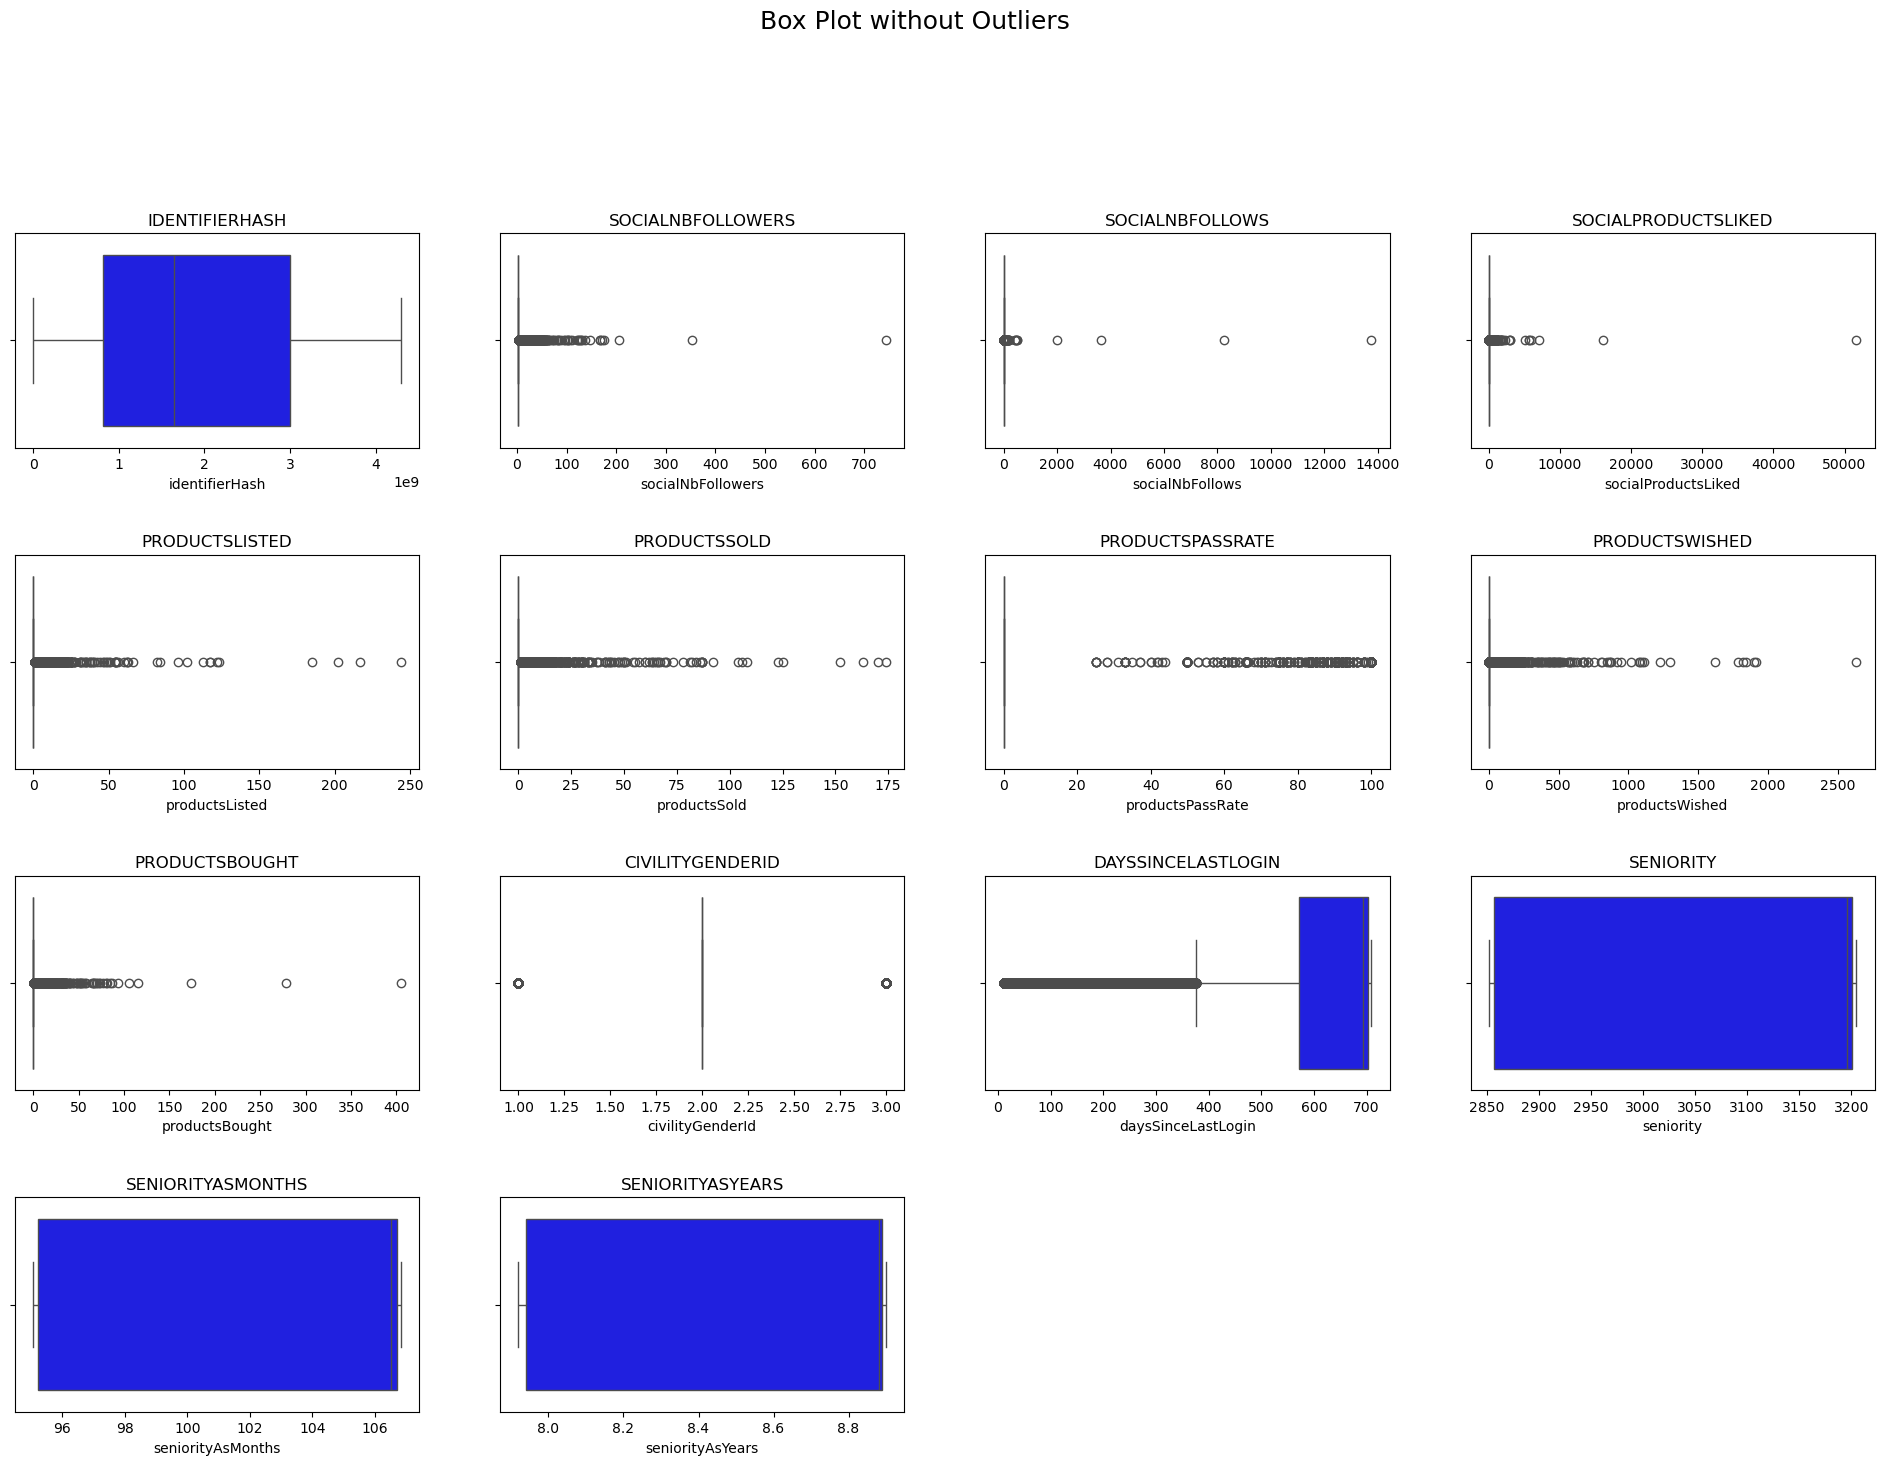

In [111]:
plt.figure(figsize=(24, 32))
plt.suptitle("Box Plot without Outliers", fontsize=18, y=0.95)
#plot the all figures in loop with boxplot
for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='blue' ,ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [113]:
df_no = df.select_dtypes(include=[np.number])
Q1 = df_no.quantile(0.25)
Q3 = df_no.quantile(0.75)
IQR = Q3 - Q1
df= df[~((df_no < (Q1 - 1.5 *IQR)) | (df_no > (Q3 + 1.5 * IQR))).any(axis=1)]

In [115]:
df_no_outliers = df[~((df_no >= (Q1 - 1.5 *IQR)) & (df_no <= (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")

Original DataFrame shape: (48673, 24)
DataFrame shape after removing outliers: (0, 24)


In [117]:
outliers_count = df
outliers_count = df.shape[0] - df_no_outliers.shape[0]
print(f"Number of outliers removed: {outliers_count}")

Number of outliers removed: 48673


In [119]:
# After Removing outliers
df.describe()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,4.867300e+04,48673.0,48673.0,48673.0,48673.0,48673.0,48673.0,48673.0,48673.0,48673.0,48673.000000,48673.000000,48673.000000,48673.000000
mean,1.978819e+09,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,675.215890,3067.714154,102.257102,8.521337
std,1.375830e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.697137,167.452102,5.581404,0.465749
min,6.544300e+04,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,377.000000,2852.000000,95.070000,7.920000
25%,6.971719e+08,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,692.000000,2856.000000,95.200000,7.930000
50%,1.823801e+09,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,698.000000,3197.000000,106.570000,8.880000
75%,3.245670e+09,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,703.000000,3201.000000,106.700000,8.890000
max,4.294967e+09,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,709.000000,3205.000000,106.830000,8.900000


In [121]:
df.shape

(48673, 24)

#### Rows = 48673 and Columns = 24

In [130]:
PurchaseCounts = df["productsBought"]. value_counts()
PurchaseCounts.reset_index()

,productsBought,count
0,0,48673


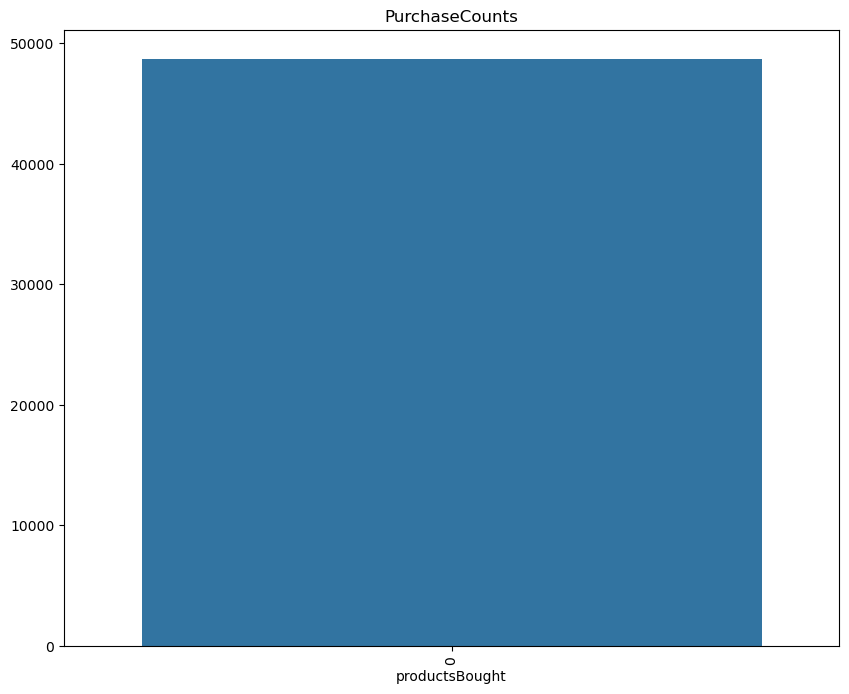

In [132]:
plt.figure(figsize = (10,8))
sns.barplot(x=PurchaseCounts.index, y=PurchaseCounts.values)
plt.title("PurchaseCounts")
plt.xticks(rotation=90)
plt.show()

In [126]:
X = df.drop("productsBought", axis=1)  # Features
y = df["productsBought"]                # Target variable



# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (38938, 23) (38938,)
Test set shape: (9735, 23) (9735,)


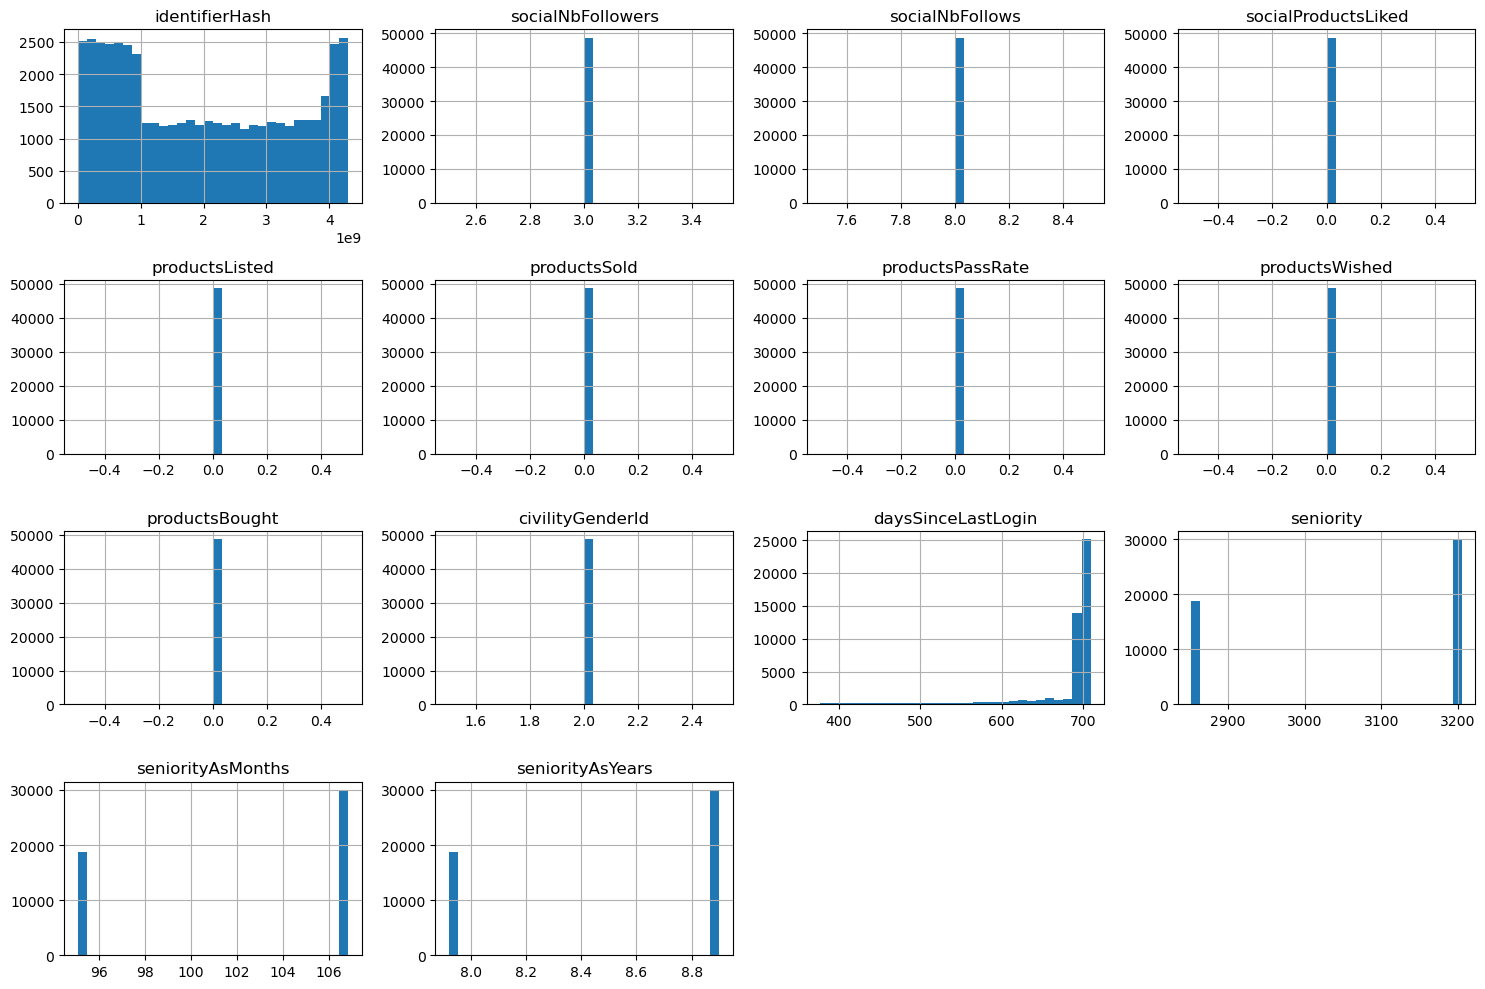

In [138]:
# Identify numeric columns in the DataFrame
numeric_cols = df.select_dtypes(include=['number']).columns

# Plot histograms for each numeric column
df[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

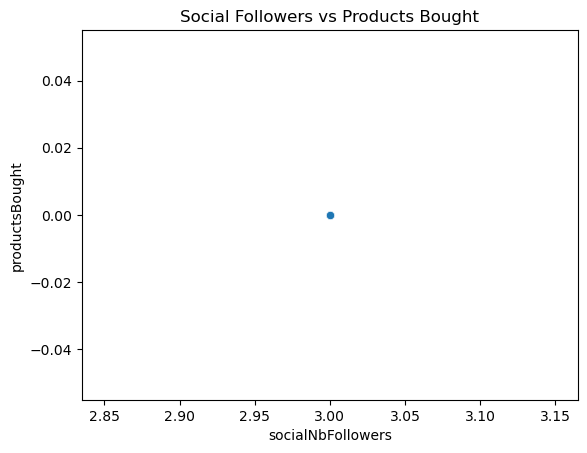

In [140]:
sns.scatterplot(x='socialNbFollowers', y='productsBought', data=df)
plt.title("Social Followers vs Products Bought")
plt.show()

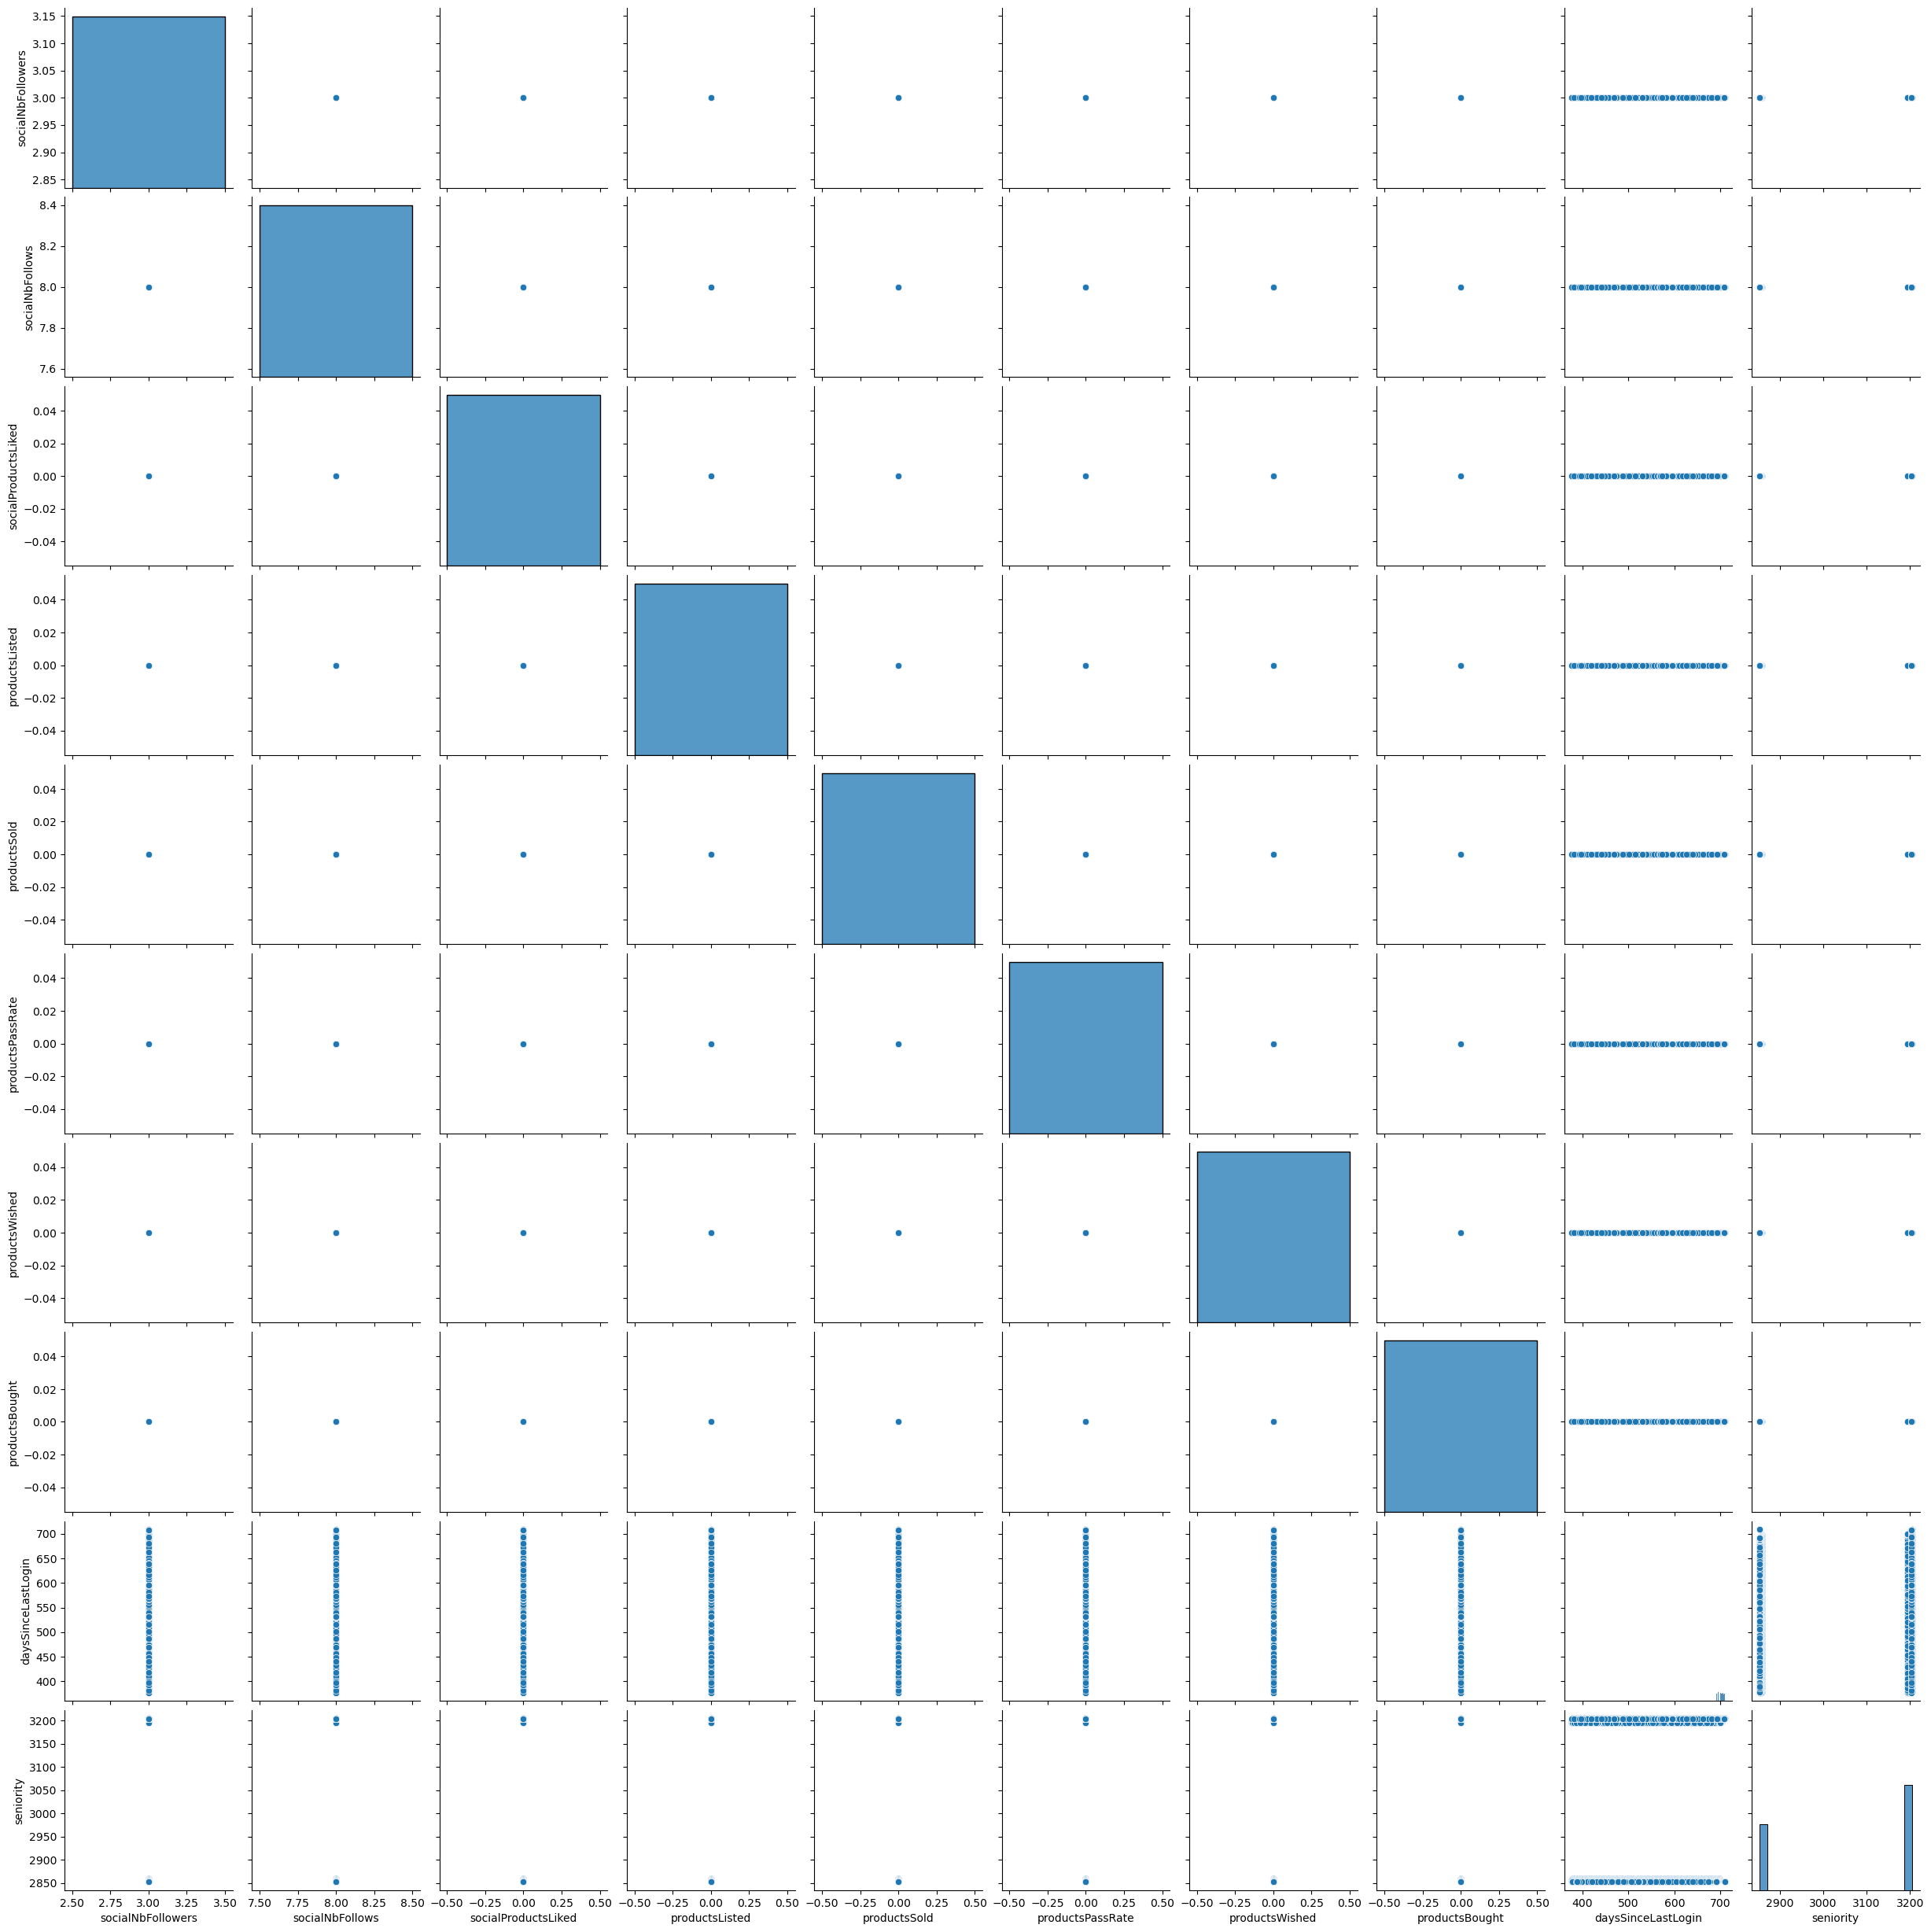

In [146]:
sns.pairplot(df[['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked', 'productsListed', 
                'productsSold', 'productsPassRate', 'productsWished', 'productsBought', 
                'daysSinceLastLogin', 'seniority']])